In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import random
import trace_analyse as tfn

# sys.path.insert(1, '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/admin_tools/admin_tools')
# from admin_tools import admin_functions as adm
import admin_functions as adfn


# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_data = '/mnlsc/data/MCBL4/dburrows/'
s_code = '~/Documents/multiscale_dev_dynamics'

%load_ext autoreload
sys.version

'3.7.4 (default, Aug 13 2019, 15:17:50) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Global brain states


In [9]:
#Load developmental data
meta_l = adfn.return_files(s_data, 'dev', '*6dpf*state*')
bind_l = adfn.return_files(s_data, 'dev', '*regbin*')
coord_l = adfn.return_files(s_data, 'dev', '*6dpf*labco*')
trace_l = adfn.return_files(s_data, '', '*6dpf*regtra*')
meta_l, bind_l, coord_l, trace_l

(['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_labcoord.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_labcoord.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_labcoord.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-

In [ ]:
from sklearn.cluster import AffinityPropagation
import copy

data_list = bind_l
for i in range(len(data_list)):
    data = np.load(data_list[i])[:,1:-1].T
    name = data_list[i]

    #Empirical data
    all_clust, sub_clust = mfn.affprop(data) #cluster with affinity prop on empirical data
    emp_sim = mfn.Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

    #Generate null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = mfn.affprop(rpks) #cluster with affinity prop on null data
    null_sim = mfn.Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
    n_states = len(emp_sim > np.max(null_sim))
    if len(emp_sim) > n_states:
      print('null model removed a cluster')

    fin_clust = sub_clust[emp_sim > max(null_sim)] #Find the clusters that occur above chance

    np.save(Fdata + 'BLNDEV-WILDTYPE/' + name[:name.find('run')+6] + '_' +'state-labels.npy', [all_clust, sub_clust, fin_clust]) 

    print('Done' + str(i))

In [4]:
#Load developmental data
meta_l = adfn.return_files(s_data, 'dev', '*6dpf*state*')
bind_l = adfn.return_files(s_data, 'dev', '*regbin*')
coord_l = adfn.return_files(s_data, 'dev', '*6dpf*labco*')
meta_l, bind_l, coord_l

(['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_labcoord.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_labcoord.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_labcoord.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-

In [28]:
ch=2
state_a = np.load(meta_l[ch], allow_pickle=True)
bind_a = np.load(bind_l[ch], allow_pickle=True)[:,1:-1]
coord_a = np.load(coord_l[ch], allow_pickle=True)
state_a.shape, bind_a.shape, coord_a.shape

FileNotFoundError: [Errno 2] No such file or directory: 'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy'

In [14]:
bind_a

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Visualise state space

** use dff?

In [2]:
trace_l = adfn.return_files(s_data, 'dev', '*6dpf*regtra*')
trace_l

['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-06_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy']

In [21]:
def nonlinembed(data):
    from sklearn.manifold import Isomap

    embedding = Isomap(n_components=3)
    X_transformed = embedding.fit_transform(data)
    return(X_transformed)

In [68]:
#======================================================================================
def state_dist(data):
#======================================================================================
    """
    This functions calculates the euclidean distance from one point in time to to the next in state space. 
    
    Inputs:
        data (np array): cells x timeframes

    Returns:
        dist (np array): 1d vector, distance distribution
    """
    import numpy as np
    dist = np.zeros((data.shape[1])-1)
    for i in range(dist.shape[0]):
        data_t0 = data[:,i]/np.linalg.norm(data[:,i])
        data_t1 = data[:,i+1]/np.linalg.norm(data[:,i+1])
        
        dist[i] = np.linalg.norm(data_t0 - data_t1)#euclidean distance distribution
    return(dist)

In [67]:
np.linalg.norm(data[:,0])

117847.805

In [16]:
data_mean = np.apply_over_axes(np.mean,data, 0)
data_mean

array([[796.77704, 798.16797, 793.00964, ..., 601.5926 , 605.34326,
        593.9879 ]], dtype=float32)

In [69]:
##isomap TRAJECTORIES
ch=0
data = np.load(trace_l[ch])
scaled_data = scale(data)
prac = nonlinembed(scaled_data.T)

/home/dburrows/anaconda3/envs/py_374/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/home/dburrows/anaconda3/envs/py_374/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/home/dburrows/anaconda3/envs/py_374/lib/python3.7/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 39 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/dburrows/anaconda3/envs/py_374/lib/python3.7/site-packages/scipy/sparse/

In [63]:
from sklearn.preprocessing import scale
from sklearn import decomposition
ch=3
data = np.load(trace_l[ch])
scaled_data = scale(data)
#Find first 3 components
pca = decomposition.PCA(3)
fit = pca.fit(scaled_data)
output_data = fit.components_

/home/dburrows/anaconda3/envs/py_374/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/home/dburrows/anaconda3/envs/py_374/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


In [55]:
ch=2
data = np.load(trace_l[ch])

from sklearn.manifold import TSNE
X = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(data.T)


0


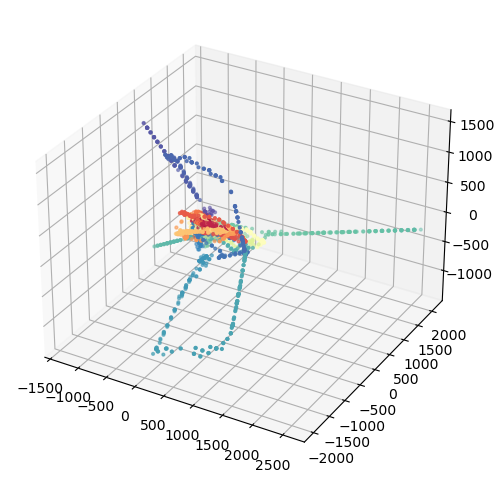

In [46]:
print(ch)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(prac[:,0], prac[:,1],prac[:,2], c = np.arange(0,prac.shape[0]), cmap='Spectral', s=4)
plt.show()

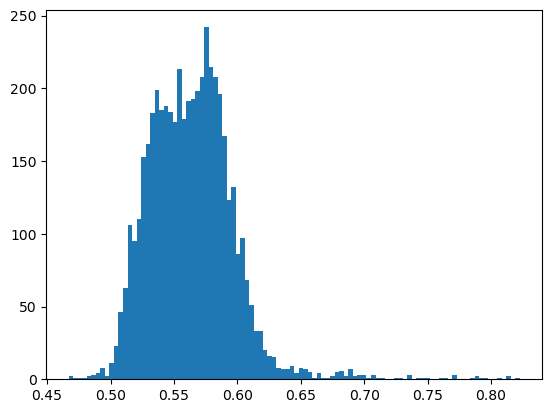

In [76]:
ch=0
data = np.load(trace_l[ch])
state_data = state_dist(data)
plt.hist(state_data, bins=100)
plt.show()

0


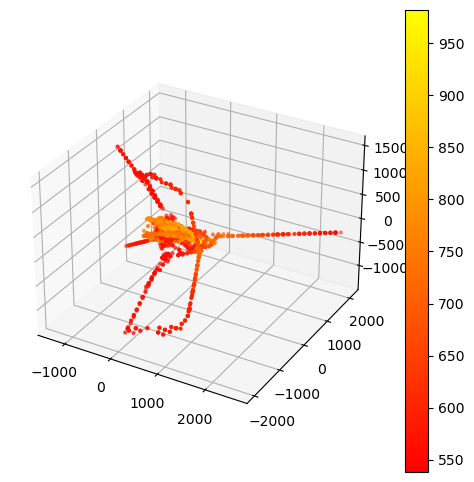

In [48]:
print(ch)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(prac[:,0], prac[:,1],prac[:,2], c = data_mean, cmap='autumn', s=4)
fig.colorbar(p, ax=ax)
plt.show()

0


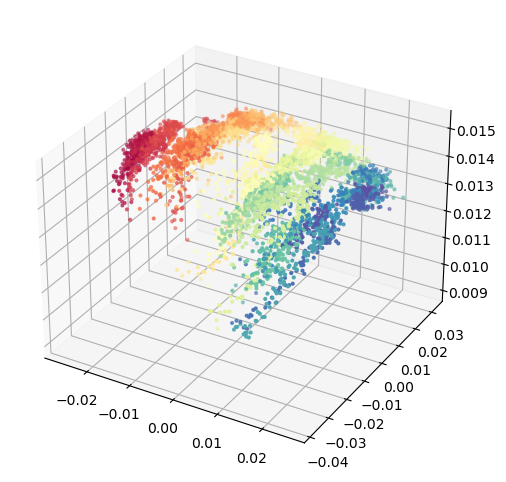

In [33]:
print(ch)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(output_data[1], output_data[2],output_data[0], c = np.arange(0,output_data.shape[1]), cmap='Spectral', s=4)
plt.show()

0


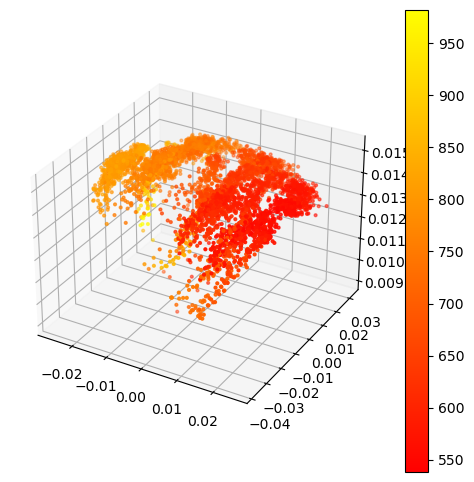

In [44]:
print(ch)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(output_data[1], output_data[2],output_data[0], c = data_mean, cmap='autumn', s=4)
fig.colorbar(p)
plt.show()

1


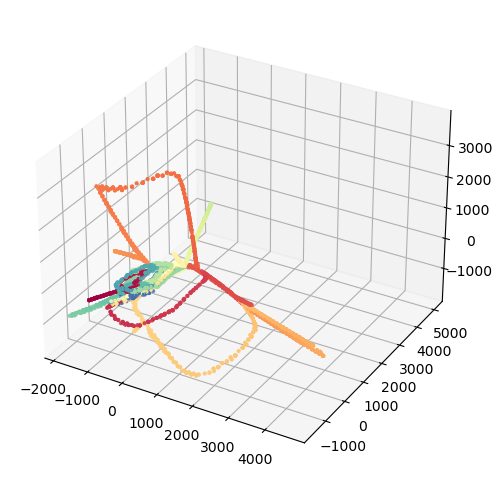

In [50]:
print(ch)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(prac[:,0], prac[:,1],prac[:,2], c = np.arange(0,prac.shape[0]), cmap='Spectral', s=4)
plt.show()

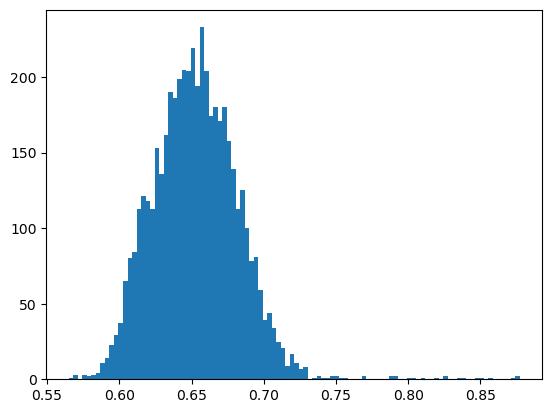

In [77]:
ch=1
data = np.load(trace_l[ch])
state_data = state_dist(data)
plt.hist(state_data, bins=100)
plt.show()

1


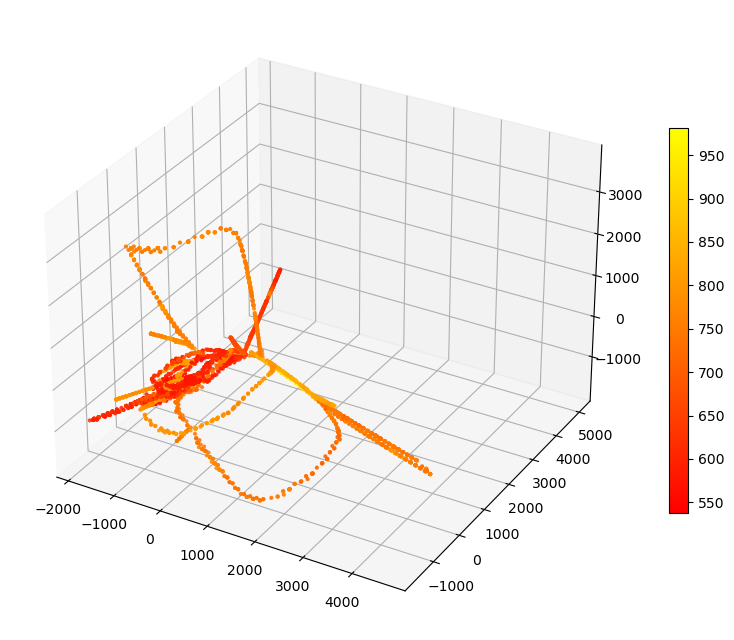

In [54]:
print(ch)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(prac[:,0], prac[:,1],prac[:,2], c = data_mean, cmap='autumn', s=4)
fig.colorbar(p, ax=ax, shrink = 0.5)
plt.show()

1


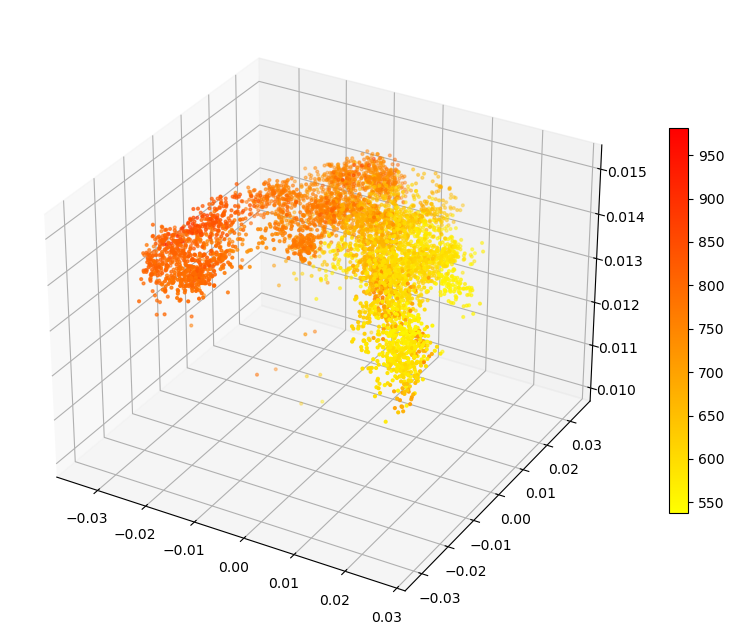

In [56]:
print(ch)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(output_data[1], output_data[2],output_data[0], c = data_mean, cmap='autumn_r', s=4)
fig.colorbar(p, shrink=0.5)
plt.show()

2


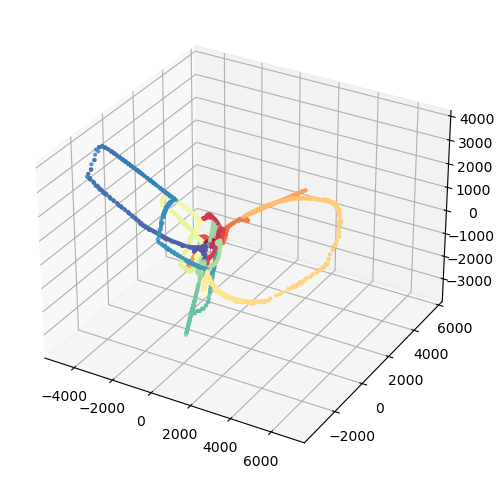

In [59]:
print(ch)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(prac[:,0], prac[:,1],prac[:,2], c = np.arange(0,prac.shape[0]), cmap='Spectral', s=4)
plt.show()

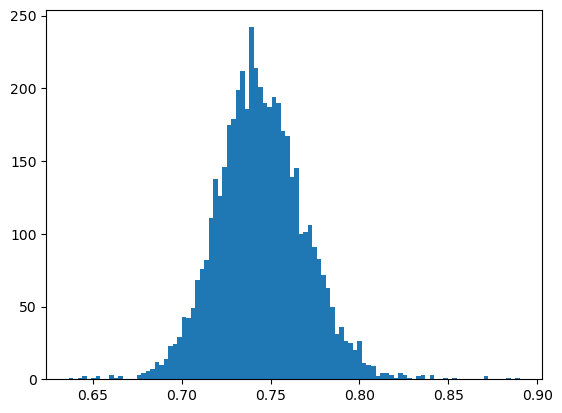

In [78]:
ch=2
data = np.load(trace_l[ch])
state_data = state_dist(data)
plt.hist(state_data, bins=100)
plt.show()

2


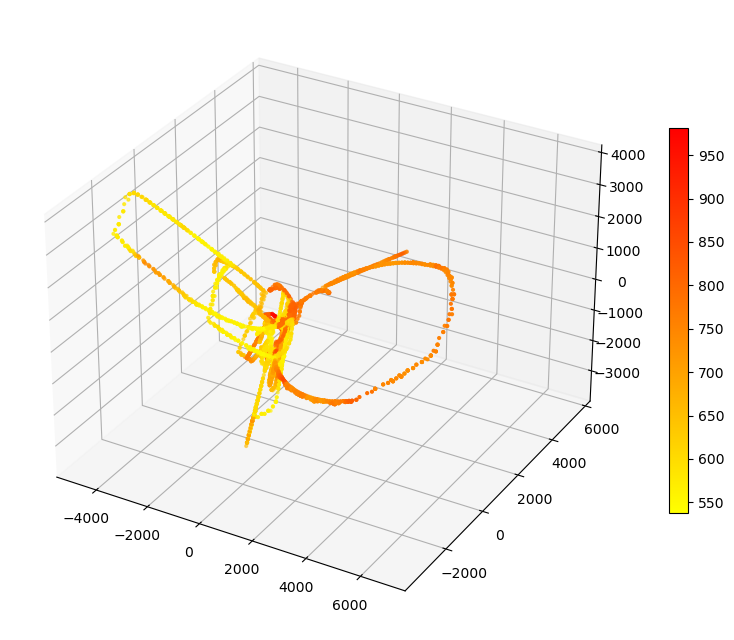

In [61]:
print(ch)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(prac[:,0], prac[:,1],prac[:,2], c = data_mean, cmap='autumn_r', s=4)
fig.colorbar(p, ax=ax, shrink = 0.5)
plt.show()

2


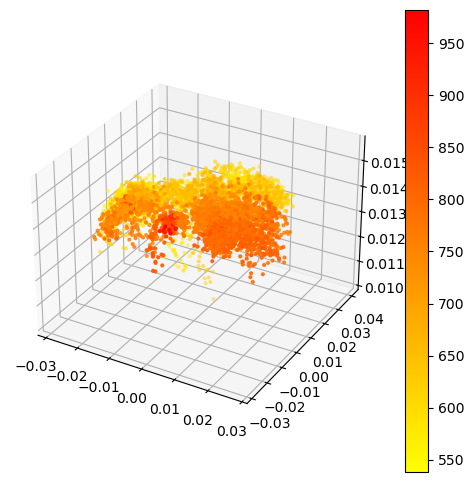

In [60]:
print(ch)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(output_data[1], output_data[2],output_data[0], c = data_mean, cmap='autumn_r', s=4)
fig.colorbar(p)
plt.show()

3


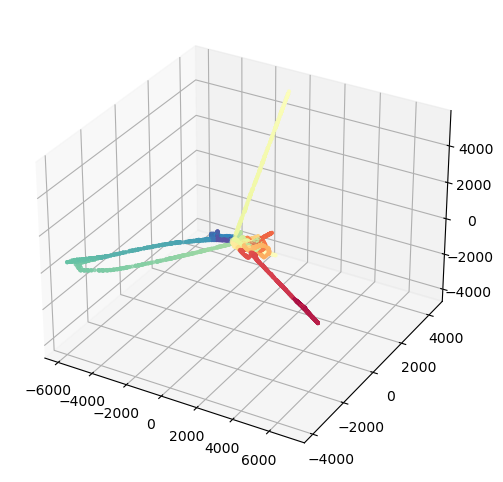

In [64]:
print(ch)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(prac[:,0], prac[:,1],prac[:,2], c = np.arange(0,prac.shape[0]), cmap='Spectral', s=4)
plt.show()

3


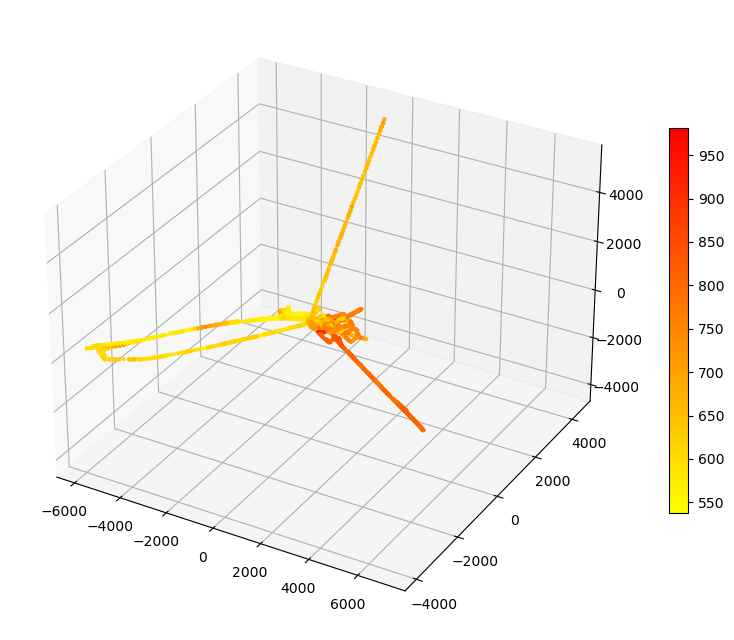

In [65]:
print(ch)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(prac[:,0], prac[:,1],prac[:,2], c = data_mean, cmap='autumn_r', s=4)
fig.colorbar(p, ax=ax, shrink = 0.5)
plt.show()

In [95]:
from sklearn.preprocessing import scale
from sklearn import decomposition

#Find first 3 components
pca = decomposition.PCA(100)
fit = pca.fit(scaled_data)
output_data = fit.components_

fig,ax = plt.figure(figsize=(6,6))
plt.plot(fit.explained_variance_ratio_)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

TypeError: cannot unpack non-iterable Figure object

<Figure size 600x600 with 0 Axes>

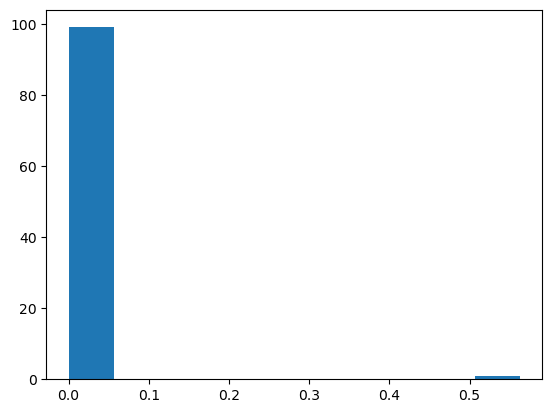

In [98]:
plt.hist(fit.explained_variance_ratio_, bins=10)
plt.show()

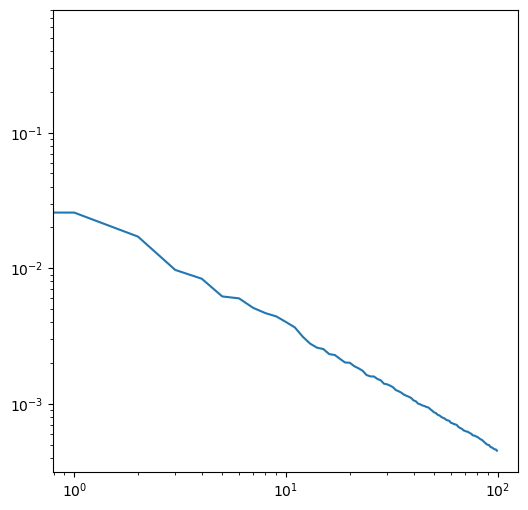

In [96]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(fit.explained_variance_ratio_)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

### Visualise neuronal activity of states

In [ ]:
state_a = np.load(meta_l[0], allow_pickle=True)
bind_a = np.load(bind_l[0], allow_pickle=True)[:,1:-1]
coord_a = np.load(coord_l[0], allow_pickle=True)
state_a.shape, bind_a.shape, coord_a.shape

In [ ]:
time_lab = state_a[0] #labels of each time point
unq_lab = state_a[2] #unique states 
unq_lab

In [ ]:
ch=0
prac_state = unq_lab[ch] #state number
curr_state = bind_a[time_lab == prac_state] #neuronal activity of current state

In [ ]:
mean_state = np.mean(curr_state, axis=)

In [ ]:
plt.subplots(figsize=(6,6))
plt.scatter(coord_a[0], coord_a[1], s = 1, c = mean_state, cmap='Spectral')
plt.show()

# State statistics

In [2]:
#Calculate criticality statistics
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*dyna*')

par_list = ['n_states', 'm_dwell', 'null_m_dwell', 'dist', 'le']
par_list

['n_states', 'm_dwell', 'null_m_dwell', 'dist', 'le']

In [33]:
#Number of states
age_l, reg_l, data_l = [],[],[]
for t in range(len(trace_l)):
    age_l.append(trace_l[t].split('dpf')[0][-1])
    reg_l.append(trace_l[t].split('_run-01_')[1].split('_dynamics.npy')[0])
    data_l.append(np.load(trace_l[t], allow_pickle=True).item()['n_states'])
state_df = pd.DataFrabme({'age':age_l, 'region':reg_l, 'data':data_l})

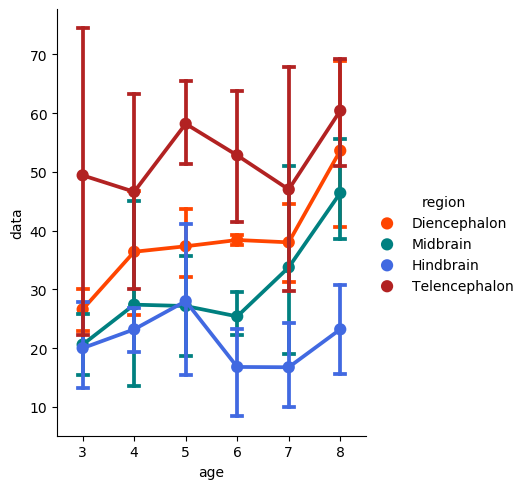

In [45]:
import seaborn as sns
nom = 'n states'
data_name = 'data'
dic = state_df
dic['data'] = dic['data'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, y='data', x='age', hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
# cat_plot.set_yticklabels(fontsize=10)  # Set y-axis tick labels
# cat_plot.set_xticklabels(fontsize=10)  # Set x-axis tick labels
# cat_plot.set_axis_labels('day post fertilisation', nom)
# cat_plot.set_xlabels(fontsize=20)
# cat_plot.set_ylabels(fontsize=20)
# # plt.ylim(0.85, 1.01)
# # plt.hlines(1, 0,5, linestyles='--', color = 'k', linewidth=2)
# plt.yticks(size = 20)
# plt.xticks(size = 20)

#plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [47]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Telencephalon"], dic["age"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Diencephalon"], dic["age"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic[data_name][dic["region"] == "Midbrain"], dic["age"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic[data_name][dic["region"] == "Hindbrain"], dic["age"][dic["region"] == "Hindbrain"])}')

Telencephalon SpearmanrResult(correlation=0.12285141030620342, pvalue=0.5177937948443174)
Diencephalon SpearmanrResult(correlation=0.5437101400598636, pvalue=0.0018999691312424662)
Midbrain SpearmanrResult(correlation=0.4945067694058714, pvalue=0.005472700522274662)
Hindbrain SpearmanrResult(correlation=-0.07868527854091252, pvalue=0.6793824427141606)


In [52]:
# mean dwell time``
age_l, reg_l, data_l = [],[],[]
for t in range(len(trace_l)):
    age_l.append(trace_l[t].split('dpf')[0][-1])
    reg_l.append(trace_l[t].split('_run-01_')[1].split('_dynamics.npy')[0])
    data_l.append(np.mean(np.load(trace_l[t], allow_pickle=True).item()['m_dwell']))
dwell_df = pd.DataFrame({'age':age_l, 'region':reg_l, 'data':data_l})

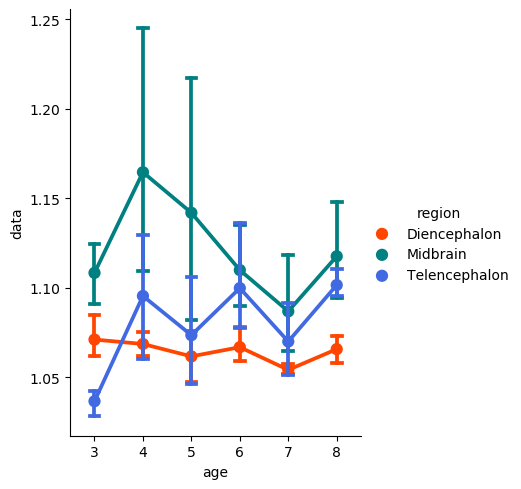

In [56]:
import seaborn as sns
nom = 'mean dwell time'
data_name = 'data'
dic = dwell_df
dic['data'] = dic['data'].astype(float)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, y='data', x='age', hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
# cat_plot.set_yticklabels(fontsize=10)  # Set y-axis tick labels
# cat_plot.set_xticklabels(fontsize=10)  # Set x-axis tick labels
# cat_plot.set_axis_labels('day post fertilisation', nom)
# cat_plot.set_xlabels(fontsize=20)
# cat_plot.set_ylabels(fontsize=20)
# # plt.ylim(0.85, 1.01)
# # plt.hlines(1, 0,5, linestyles='--', color = 'k', linewidth=2)
# plt.yticks(size = 20)
# plt.xticks(size = 20)

#plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [57]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Telencephalon"], dic["age"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Diencephalon"], dic["age"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic[data_name][dic["region"] == "Midbrain"], dic["age"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic[data_name][dic["region"] == "Hindbrain"], dic["age"][dic["region"] == "Hindbrain"])}')

Telencephalon SpearmanrResult(correlation=0.43659162732895074, pvalue=0.015858969947222707)
Diencephalon SpearmanrResult(correlation=-0.21412168182696342, pvalue=0.2558737587390037)
Midbrain SpearmanrResult(correlation=-0.16809341724034538, pvalue=0.37459144894787333)
Hindbrain SpearmanrResult(correlation=0.16200144104505768, pvalue=0.39239329086854546)


In [4]:
# state dist`
age_l, reg_l, data_l = [],[],[]
for t in range(len(trace_l)):
    age_l.append(trace_l[t].split('dpf')[0][-1])
    reg_l.append(trace_l[t].split('_run-01_')[1].split('_dynamics.npy')[0])
    data_l.append(np.median(np.load(trace_l[t], allow_pickle=True).item()['dist']))
dist_df = pd.DataFrame({'age':age_l, 'region':reg_l, 'data':data_l})

ValueError: can only convert an array of size 1 to a Python scalar

# State distance analysis


In [ ]:
old_state_df = pd.read_csv(Fdata + 'BLNDEV-WILDTYPE/similarity.csv')
new_state_df = pd.read_csv(Fdata + 'BLNDEV-WILDTYPE/new_similarity.csv')

In [6]:
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regdelta*')
dff_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regdelt*')
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*')
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*labcoor*')
len(trace_l), len(dff_l), len(bind_l), len(coord_l)

(30, 30, 30, 30)

In [9]:
%autoreload
# Run brain dynamics stats across all brain areas
ed_l = []
cos_l = []
mag_l = []
age_l, reg_l = [],[]
reg_list = ['Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']
for i in range(len(trace_l)):
    trace = np.load(dff_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(dff_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(dff_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        
        age_l.append(trace_l[i].split('dpf')[0][-1])
        reg_l.append(reg)

        #compute euclidean state distance -> overall velocity
        ed_l.append(np.mean(tfn.state_dist_normbycell(sub_dff)))
        #compute cosine similarity -> change in vector orientation
        cos_l.append(np.mean(tfn.cosine_sim(sub_dff)))
        #compute change in vector magnitude
        mag_l.append(np.mean(tfn.magnitude_distance(sub_dff)))

     
    print('Processed ' + name)
state_df = pd.DataFrame({'age':age_l, 'region':reg_l, 'state_dist': ed_l, 'cosine':cos_l, 'magnitude' :mag_l})
state_df.to_csv(Fdata + 'BLNDEV-WILDTYPE/new_similarity.csv')

Processed BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01


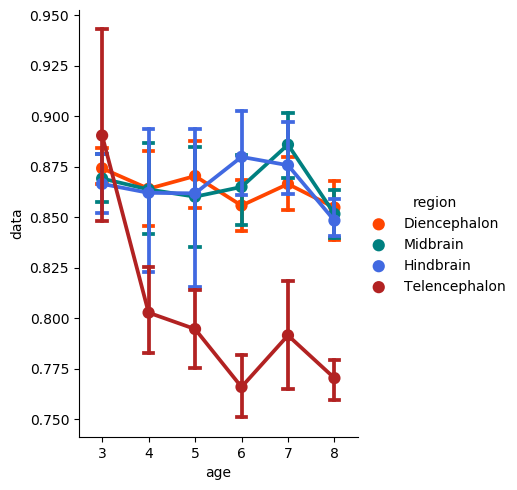

In [68]:
import seaborn as sns
nom = 'mean dwell time'
data_name = 'data'
dic = dist_df
dic['data'] = dic['data'].astype(float)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, y='data', x='age', hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain','Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
# cat_plot.set_yticklabels(fontsize=10)  # Set y-axis tick labels
# cat_plot.set_xticklabels(fontsize=10)  # Set x-axis tick labels
# cat_plot.set_axis_labels('day post fertilisation', nom)
# cat_plot.set_xlabels(fontsize=20)
# cat_plot.set_ylabels(fontsize=20)
# # plt.ylim(0.85, 1.01)
# # plt.hlines(1, 0,5, linestyles='--', color = 'k', linewidth=2)
# plt.yticks(size = 20)
# plt.xticks(size = 20)

#plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [ ]:
# what is the timescale of this rotational stability? -> how long does this rotational stability last for?
# i.e. as you look further into the future how long do state vectors remain rotationally stable

# plot above plot 

In [4]:
#Calculate cosine similarity
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regtrace*')
dff_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regdelt*')
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*')
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*labcoor*')
len(trace_l), len(dff_l), len(bind_l), len(coord_l)

(30, 30, 30, 30)

In [305]:
# Run brain dynamics stats across all brain areas
cos_l, mag_l, age_l, reg_l, mean = [],[],[],[],[]
reg_list = ['Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']
age_l, reg_l, cos_l, ed_cell_l, ed_magcell_l, mean = [],[],[],[],[],[]
for i in range(len(trace_l)):
    trace = np.load(dff_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(dff_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(dff_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        
        age_l.append(trace_l[i].split('dpf')[0][-1])
        reg_l.append(reg)
        cos_l.append(np.mean(cosine(sub_dff)))
        # ed_cell_l.append(np.mean(state_dist_normbycell(sub_dff)))
        # ed_magcell_l.append(np.mean(state_dist_normbymagcell(sub_dff)))
        mean.append(cosine_all_fast(sub_dff))
        mag_l.append(np.mean(state_dist_mag_normcell(sub_dff)))

     
    print('Processed ' + name)
state_df = pd.DataFrame({'age':age_l, 'region':reg_l, 'cosine':cos_l, 'magnitude' :mag_l, 'mean_cosine_all':mean})
state_df.to_csv(Fdata + 'BLNDEV-WILDTYPE/similarity.csv')


Processed BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-7dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-8dpf_BLNGR

In [ ]:
# Run brain dynamics stats across all brain areas
cos_l, mag_l, age_l, reg_l, mean = [],[],[],[],[]
reg_list = ['Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']
age_l, reg_l, cos_l, ed_cell_l, ed_magcell_l, mean = [],[],[],[],[],[]
for i in range(len(trace_l)):
    trace = np.load(dff_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(dff_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(dff_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        
        age_l.append(trace_l[i].split('dpf')[0][-1])
        reg_l.append(reg)
        cos_l.append(np.mean(cosine(sub_dff)))
        # ed_cell_l.append(np.mean(state_dist_normbycell(sub_dff)))
        # ed_magcell_l.append(np.mean(state_dist_normbymagcell(sub_dff)))
        mean.append(cosine_all_fast(sub_dff))
        mag_l.append(np.mean(state_dist_mag_normcell(sub_dff)))

     
    print('Processed ' + name)
state_df = pd.DataFrame({'age':age_l, 'region':reg_l, 'cosine':cos_l})
state_df.to_csv(Fdata + 'BLNDEV-WILDTYPE/similarity.csv')


In [80]:
# Run brain dynamics stats across all brain areas
cos_l, mag_l, age_l, reg_l, mean,shuff_cosl = [],[],[],[],[],[]
reg_list = ['Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']
age_l, reg_l, cos_l, ed_cell_l, ed_magcell_l, mean = [],[],[],[],[],[]
for i in range(len(trace_l)):
    trace = np.load(dff_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(dff_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(dff_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        
        
        age_l.append(trace_l[i].split('dpf')[0][-1])
        reg_l.append(reg)
        cos_l.append(np.mean(cosine(sub_dff)))
        # ed_cell_l.append(np.mean(state_dist_normbycell(sub_dff)))
        # ed_magcell_l.append(np.mean(state_dist_normbymagcell(sub_dff)))
        #mean.append(cosine_all_fast(sub_dff))
        #mag_l.append(np.mean(state_dist_mag_normcell(sub_dff)))


        shuffcos=[]
        for x in range(50):
            if sub_dff.shape[0]<300:
                subsub_dff = sub_dff
            else:
                subsub_dff = sub_dff[np.random.choice(range(0,sub_dff.shape[0]), int(300))]
            shuffcos.append(np.mean(cosine(subsub_dff)))
        shuff_cosl.append(shuffcos)

    print('Processed ' + name)
shuff_state_df = pd.DataFrame({'age':age_l, 'region':reg_l, 'cosine':cos_l, 'shuff_cos':shuff_cosl})
shuff_state_df.to_csv(Fdata + 'BLNDEV-WILDTYPE/shuff_similarity.csv')

Processed BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-7dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-8dpf_BLNGR

In [82]:
shuff_state_df

,age,region,cosine,shuff_cos
0,4,Telencephalon,0.669027,"[0.6721055503243778, 0.6757118661257867, 0.653..."
1,4,Diencephalon,0.612868,"[0.6367682659099907, 0.6049382464236727, 0.602..."
2,4,Midbrain,0.637572,"[0.6367583275226713, 0.6484409340637318, 0.628..."
3,4,Hindbrain,0.627054,"[0.6403014839243886, 0.630525326661309, 0.6209..."
4,5,Telencephalon,0.660946,"[0.6825885677103879, 0.6482876899113711, 0.660..."
...,...,...,...,...
115,5,Hindbrain,0.608376,"[0.6038003916776118, 0.6139154014568203, 0.609..."
116,8,Telencephalon,0.720531,"[0.7189772594041327, 0.7283106051563112, 0.720..."
117,8,Diencephalon,0.663899,"[0.6520168672712878, 0.6678730891345792, 0.666..."
118,8,Midbrain,0.635506,"[0.6352092196615147, 0.6241902296069608, 0.651..."


In [84]:
data= []
age = []
reg = []
for i in range(len(shuff_state_df['shuff_cos'])):
    data.append(shuff_state_df['shuff_cos'][i])        
    age.append(np.repeat(shuff_state_df['age'][i],len(shuff_state_df['shuff_cos'][i])))
    reg.append(np.repeat(shuff_state_df['region'][i],len(shuff_state_df['shuff_cos'][i])))
sub_df = pd.DataFrame({ 'age':np.ravel(age), 'region':np.ravel(reg), 'data':np.ravel(data)})

In [85]:
sub_df

,age,region,data
0,4,Telencephalon,0.672106
1,4,Telencephalon,0.675712
2,4,Telencephalon,0.653724
3,4,Telencephalon,0.656302
4,4,Telencephalon,0.703173
...,...,...,...
5995,8,Hindbrain,0.665147
5996,8,Hindbrain,0.655987
5997,8,Hindbrain,0.655319
5998,8,Hindbrain,0.655430


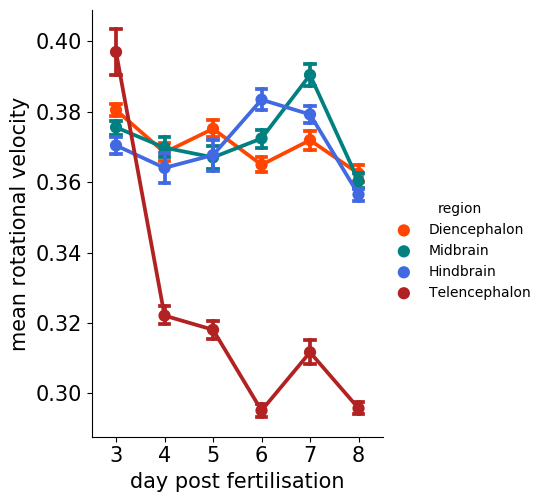

In [87]:
import seaborn as sns

nom = 'mean rotational velocity'
data_name = 'data'
dic = sub_df
dic[data_name] = 1 - dic['data'].astype(float)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, y=data_name, x='age', hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain','Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])


cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', nom)
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)

#plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()


In [7]:
state_df = pd.read_csv(Fdata + 'BLNDEV-WILDTYPE/similarity.csv')
state_df

,Unnamed: 0,age,region,cosine,magnitude,mean_cosine_all
0,0,4,Telencephalon,0.669027,0.485535,0.516899
1,1,4,Diencephalon,0.612868,0.269481,0.525029
2,2,4,Midbrain,0.637572,0.133492,0.521992
3,3,4,Hindbrain,0.627054,0.199498,0.521981
4,4,5,Telencephalon,0.660946,0.501663,0.526014
...,...,...,...,...,...,...
115,115,5,Hindbrain,0.608376,0.339377,0.463484
116,116,8,Telencephalon,0.720531,0.611251,0.505594
117,117,8,Diencephalon,0.663899,0.403219,0.519825
118,118,8,Midbrain,0.635506,0.140196,0.516640


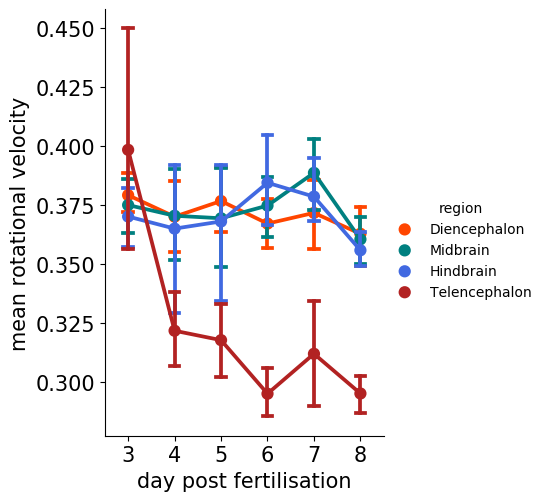

In [83]:
import seaborn as sns

nom = 'mean rotational velocity'
data_name = 'cosine_distance'
dic = state_df
dic[data_name] = 1 - dic['cosine'].astype(float)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, y=data_name, x='age', hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain','Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])


cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', nom)
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)

#plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()


In [313]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["cosine_distance"][dic["region"] == "Telencephalon"], dic["age"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["cosine_distance"][dic["region"] == "Diencephalon"], dic["age"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["cosine_distance"][dic["region"] == "Midbrain"], dic["age"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["cosine_distance"][dic["region"] == "Hindbrain"], dic["age"][dic["region"] == "Hindbrain"])}')

Telencephalon SpearmanrResult(correlation=-0.6705686389775926, pvalue=5.0184156372893556e-05)
Diencephalon SpearmanrResult(correlation=-0.25247856898247845, pvalue=0.17828694546874016)
Midbrain SpearmanrResult(correlation=-0.036100599675778874, pvalue=0.8497866194179927)
Hindbrain SpearmanrResult(correlation=-0.12138826640980646, pvalue=0.5228299237795219)


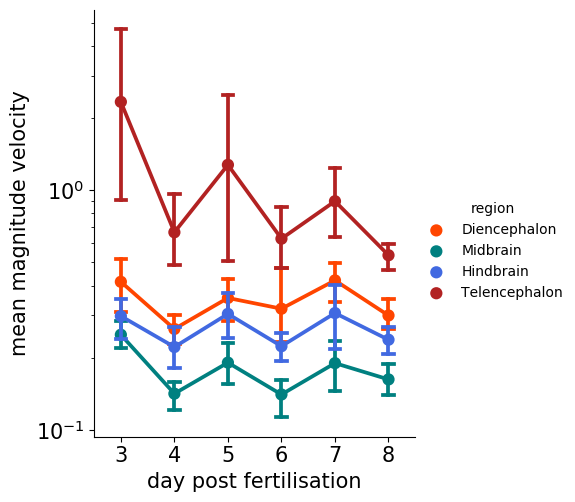

In [8]:
import seaborn as sns

nom = 'mean magnitude velocity'
data_name = 'magnitude'
dic = state_df
dic[data_name] = dic[data_name].astype(float)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, y=data_name, x='age', hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain','Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])


cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', nom)
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)
plt.yscale('log')
#plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()


In [310]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["magnitude"][dic["region"] == "Telencephalon"], dic["age"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["magnitude"][dic["region"] == "Diencephalon"], dic["age"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["magnitude"][dic["region"] == "Midbrain"], dic["age"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["magnitude"][dic["region"] == "Hindbrain"], dic["age"][dic["region"] == "Hindbrain"])}')

Telencephalon SpearmanrResult(correlation=-0.32016719337456384, pvalue=0.08455474687076331)
Diencephalon SpearmanrResult(correlation=-0.042418204619040174, pvalue=0.8238765847639087)
Midbrain SpearmanrResult(correlation=-0.29151234238191437, pvalue=0.11805234183315426)
Hindbrain SpearmanrResult(correlation=-0.11349126023072982, pvalue=0.550415064099926)


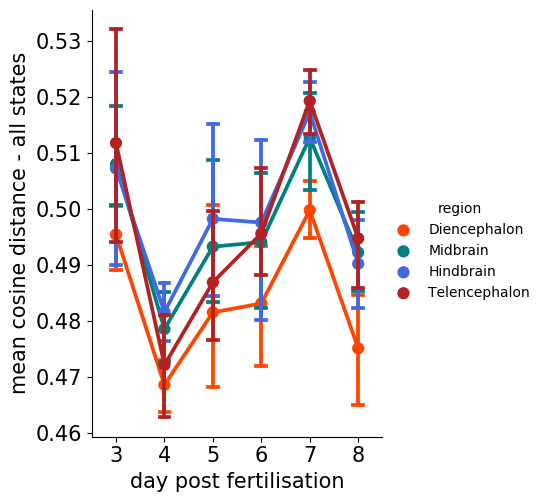

In [146]:
# check if slower dynamics are a function of timesteps or across entire dataset

import seaborn as sns
nom = 'mean cosine distance - all states'
data_name = 'mean_cosine_all_dist'
dic = state_df
dic['mean_cosine_all_dist'] = 1 - dic['mean_cosine_all'].astype(float)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, y=data_name, x='age', hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain','Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', nom)
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)
#plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [82]:
curr_mean

array([9.09637763, 8.79904959, 9.03953907, ..., 6.2837097 , 6.23263343,
       6.30463957])

In [109]:
len(trace_l)

30

In [27]:
# show slower timescales
# mean/summed activity -> estimate autocorrelation -> statisitcal compare, 3 -> 8 dpf
reg_list = ['Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']
age_l, reg_l, auto_mean_l, e_l, e_half_l, shuff_autol, shuff_decayl = [],[],[],[],[],[],[]
for i in range(len(trace_l)):
    trace = np.load(dff_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(dff_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(dff_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        
        age_l.append(trace_l[i].split('dpf')[0][-1])
        reg_l.append(reg)
        curr_mean = np.mean(sub_dff,axis=0)[:4913]
        auto_mean_l.append(autocorrelation(curr_mean,2))
        #e_l.append(estimate_e_folding_time(auto_mean_l[-1]))
        #e_half_l.append(estimate_half_life(auto_mean_l[-1]))
        #e_half_l.append(estimate_decay(auto_mean_l[-1]))
        e_half_l.append(auto_mean_l[-1][-1])
        # shuff_auto, shuff_decay = [],[]
        # for x in range(50):
        #     subsub_dff = sub_dff[np.random.choice(range(0,sub_dff.shape[0]), int(0.3*sub_dff.shape[0]))]
        #     sub_mean = np.mean(subsub_dff,axis=0)[:4913]
        #     shuff_auto.append(autocorrelation(sub_mean,20))
        #     shuff_decay.append(estimate_decay(shuff_auto[-1]))
        # shuff_autol.append(shuff_auto)
        # shuff_decayl.append(shuff_decay)
    print('Processed ' + name)
auto_df = pd.DataFrame({'age':age_l, 'region':reg_l, 'auto_mean': auto_mean_l, 'decay': e_half_l})#, 'auto_mean_sub': shuff_autol, 'decay_sub': shuff_decayl})

Processed BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-7dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-8dpf_BLNGR

In [71]:
# show slower timescales
# mean/summed activity -> estimate autocorrelation -> statisitcal compare, 3 -> 8 dpf
reg_list = ['Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']
age_l, reg_l, auto_mean_l, e_l, e_half_l, shuff_autol, shuff_decayl = [],[],[],[],[],[],[]
for i in range(len(trace_l)):
    trace = np.load(dff_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(dff_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(dff_l[i])

    for x,reg in enumerate(reg_list):
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        if reg=='Telencephalon':
            print(name,sub_dff.shape)
            if x ==0:
                min_ = sub_dff.shape[0]
            elif sub_dff.shape[0]<min_:
                min_ = subb_dff.shape[0]

BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01 (1086, 4914)
BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01 (961, 4914)
BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01 (1850, 4914)
BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01 (1454, 4914)
BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01 (1503, 4914)
BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01 (132, 4914)
BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01 (369, 4914)
BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01 (1090, 4914)
BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01 (1211, 4914)
BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01 (751, 4914)
BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01 (1280, 4914)
BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01 (975, 4914)
BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01 (1868, 4914)
BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01 (1054, 4914)
BLNDEV-WILDTYPE-04_2photon_sess-01-7dpf_BLNGR_run-01 (789, 4914)
BLNDEV-WILDTYPE-

In [69]:
min_

1512

In [61]:
# show slower timescales
# mean/summed activity -> estimate autocorrelation -> statisitcal compare, 3 -> 8 dpf
reg_list = ['Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']
age_l, reg_l, auto_mean_l, e_l, e_half_l, shuff_autol, shuff_decayl = [],[],[],[],[],[],[]
for i in range(len(trace_l)):
    trace = np.load(dff_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(dff_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(dff_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        
        age_l.append(trace_l[i].split('dpf')[0][-1])
        reg_l.append(reg)
        curr_mean = np.mean(sub_dff,axis=0)[:4913]
        auto_mean_l.append(autocorrelation(curr_mean,2))
        #e_l.append(estimate_e_folding_time(auto_mean_l[-1]))
        #e_half_l.append(estimate_half_life(auto_mean_l[-1]))
        #e_half_l.append(estimate_decay(auto_mean_l[-1]))
        e_half_l.append(auto_mean_l[-1][-1])

        shuff_auto, shuff_decay = [],[]
        for x in range(50):
            if sub_dff.shape[0]<300:
                subsub_dff = sub_dff
            else:
                subsub_dff = sub_dff[np.random.choice(range(0,sub_dff.shape[0]), int(300))]
            sub_mean = np.mean(subsub_dff,axis=0)[:4913]
            shuff_auto.append(autocorrelation(sub_mean,2))
            shuff_decay.append(shuff_auto[-1][-1])
        shuff_autol.append(shuff_auto)
        shuff_decayl.append(shuff_decay)
    print('Processed ' + name)
auto_df = pd.DataFrame({'age':age_l, 'region':reg_l, 'auto_mean': auto_mean_l, 'decay': e_half_l, 'auto_mean_sub': shuff_autol, 'decay_sub': shuff_decayl})

Processed BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-7dpf_BLNGR_run-01
Processed BLNDEV-WILDTYPE-04_2photon_sess-01-8dpf_BLNGR

In [37]:
auto_df

,age,region,auto_mean,decay,auto_mean_sub,decay_sub
0,4,Telencephalon,"[1.0000000000000002, 0.9560647005264838]",0.956065,"[[1.0, 0.8116453715804076], [0.999999999999999...","[0.8116453715804076, 0.8272183470401285, 0.872..."
1,4,Diencephalon,"[1.0000000000000002, 0.9823500359649283]",0.982350,"[[0.9999999999999997, 0.9311195120987125], [1....","[0.9311195120987125, 0.9435512136411652, 0.942..."
2,4,Midbrain,"[1.0000000000000002, 0.9888954433107853]",0.988895,"[[0.9999999999999998, 0.9619040390409587], [0....","[0.9619040390409587, 0.9608214009565252, 0.965..."
3,4,Hindbrain,"[0.9999999999999998, 0.9891983546175491]",0.989198,"[[1.0, 0.9698500893957888], [1.0, 0.9702340836...","[0.9698500893957888, 0.9702340836764289, 0.968..."
4,5,Telencephalon,"[1.0, 0.8692645861241209]",0.869265,"[[0.9999999999999998, 0.6155810848164283], [1....","[0.6155810848164283, 0.68884078477687, 0.69295..."
...,...,...,...,...,...,...
115,5,Hindbrain,"[1.0, 0.9739570700091066]",0.973957,"[[0.9999999999999998, 0.9219907323519794], [1....","[0.9219907323519794, 0.9399243621318355, 0.933..."
116,8,Telencephalon,"[1.0000000000000002, 0.9280474570492606]",0.928047,"[[1.0, 0.7351665506314782], [0.999999999999999...","[0.7351665506314782, 0.736146378477172, 0.7854..."
117,8,Diencephalon,"[0.9999999999999998, 0.9561040479223585]",0.956104,"[[0.9999999999999998, 0.8099722389216414], [1....","[0.8099722389216414, 0.8399870383142893, 0.798..."
118,8,Midbrain,"[1.0000000000000002, 0.9693400646643908]",0.969340,"[[1.0000000000000002, 0.876577724624593], [1.0...","[0.876577724624593, 0.8964501544809912, 0.9142..."


In [62]:
data= []
age = []
reg = []
for i in range(len(auto_df['decay_sub'])):
    data.append(auto_df['decay_sub'][i])        
    age.append(np.repeat(auto_df['age'][i],len(auto_df['decay_sub'][i])))
    reg.append(np.repeat(auto_df['region'][i],len(auto_df['decay_sub'][i])))
sub_df = pd.DataFrame({ 'age':np.ravel(age), 'region':np.ravel(reg), 'data':np.ravel(data)})

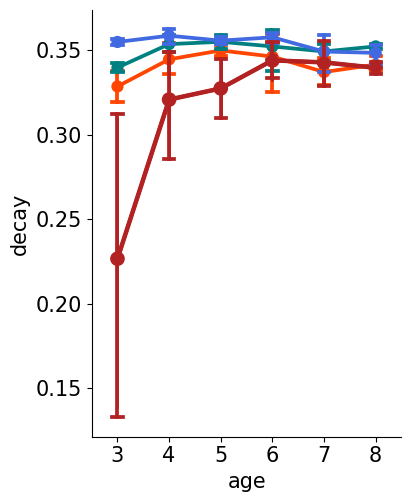

In [30]:
# check if slower dynamics are a function of timesteps or across entire dataset
import seaborn as sns
nom = 'decay time (s)'
data_name = 'decay'
dic = auto_df
dic[data_name] = dic[data_name].astype(float) 

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='age', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=.8, alpha=0.1,legend=False,
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])


cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', nom)
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)

# Create a second catplot specifically for Telencephalon on the same axes
telencephalon_data = dic[dic['region'] == 'Telencephalon']

# Use the same axes as the initial plot
sns.pointplot(
    data=telencephalon_data, 
    x='age', 
    y=data_name, 
    hue='region', 
    palette=['firebrick'], 
    ax=cat_plot.axes[0, 0], 
    markers='o',
    linestyles='-',
    scale=1.2,
    errorbar='se',
    errwidth=2, legend=False
)
plt.gca().legend().set_visible(False)
# Save the plot if needed
# plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

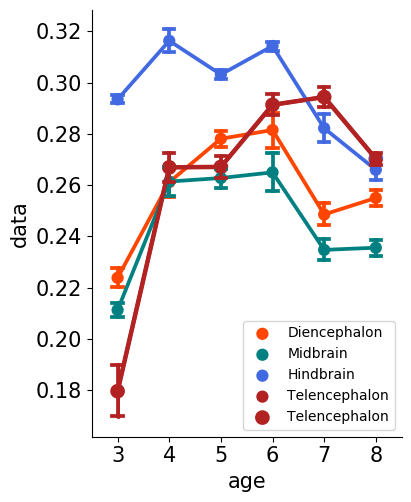

In [63]:
# check if slower dynamics are a function of timesteps or across entire dataset
import seaborn as sns
nom = 'decay time (s)'
data_name = 'data'
dic = sub_df
dic[data_name] = dic[data_name].astype(float) / 2.73

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='age', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=.8, alpha=0.1,legend=False,
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])


cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', nom)
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)

# Create a second catplot specifically for Telencephalon on the same axes
telencephalon_data = dic[dic['region'] == 'Telencephalon']

# Use the same axes as the initial plot
sns.pointplot(
    data=telencephalon_data, 
    x='age', 
    y=data_name, 
    hue='region', 
    palette=['firebrick'], 
    ax=cat_plot.axes[0, 0], 
    markers='o',
    linestyles='-',
    scale=1.2,
    errorbar='se',
    errwidth=2, legend=False
)
plt.gca().legend().set_visible(False)
# Save the plot if needed
# plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.legend()
plt.show()


In [85]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["decay"][dic["region"] == "Telencephalon"], dic["age"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["decay"][dic["region"] == "Diencephalon"], dic["age"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["decay"][dic["region"] == "Midbrain"], dic["age"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["decay"][dic["region"] == "Hindbrain"], dic["age"][dic["region"] == "Hindbrain"])}')

Telencephalon SpearmanrResult(correlation=0.4263845581384752, pvalue=0.018794379327732633)
Diencephalon SpearmanrResult(correlation=0.2001326994525991, pvalue=0.28897703012741877)
Midbrain SpearmanrResult(correlation=0.11079604030545503, pvalue=0.559982174098443)
Hindbrain SpearmanrResult(correlation=-0.08805399929785826, pvalue=0.6435802482027324)


In [297]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["decay"][dic["region"] == "Telencephalon"], dic["age"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["decay"][dic["region"] == "Diencephalon"], dic["age"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["decay"][dic["region"] == "Midbrain"], dic["age"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["decay"][dic["region"] == "Hindbrain"], dic["age"][dic["region"] == "Hindbrain"])}')

Telencephalon SpearmanrResult(correlation=0.46098016779125806, pvalue=0.010353253295804816)
Diencephalon SpearmanrResult(correlation=0.4409766882792942, pvalue=0.01472054812516764)
Midbrain SpearmanrResult(correlation=0.2825315583839765, pvalue=0.13034403575739573)
Hindbrain SpearmanrResult(correlation=-0.0022709865764277606, pvalue=0.990497297517813)


In [10]:
from matplotlib import cm
colors  = cm.Reds(np.linspace(0,1,8))


In [1]:
sub_df = auto_df[auto_df['region'] == 'Telencephalon']

for i in range(3,9):

    plt.plot(np.mean(np.asarray(sub_df[sub_df['age']==str(i)]['auto_mean']),axis=0), label = f'{i}dpf',
              c = colors[i-1], linewidth=3)

# for i in range(1,10):
#     plt.axvline(i, c = 'grey')
#plt.xscale('log')
plt.legend()
plt.savefig(Fdata + 'BLNDEV-WILDTYPE/' + 'prac.svg', transparent=True)
plt.show()

NameError: name 'auto_df' is not defined

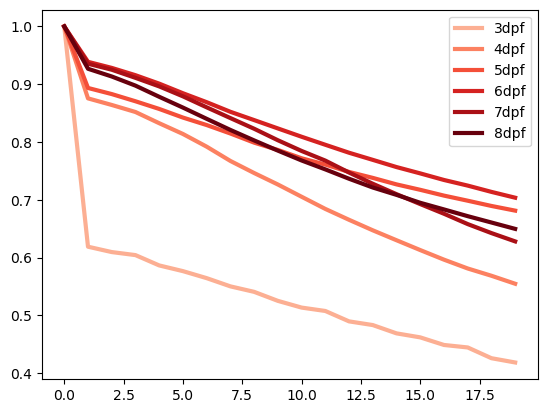

In [19]:
sub_df = auto_df[auto_df['region'] == 'Telencephalon']

for i in range(3,9):

    plt.plot(np.mean(np.asarray(sub_df[sub_df['age']==str(i)]['auto_mean']),axis=0), label = f'{i}dpf',
              c = colors[i-1], linewidth=3)

# for i in range(1,10):
#     plt.axvline(i, c = 'grey')
# plt.xscale('log')
plt.legend()
# plt.xlim(1e-10, 50)
plt.savefig(Fdata + 'BLNDEV-WILDTYPE/' + 'prac.svg', transparent=True)
plt.show()

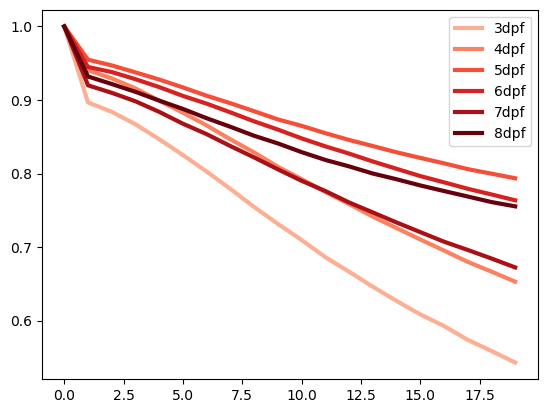

In [14]:
sub_df = auto_df[auto_df['region'] == 'Diencephalon']

for i in range(3,9):

    plt.plot(np.mean(np.asarray(sub_df[sub_df['age']==str(i)]['auto_mean']),axis=0), label = f'{i}dpf',
              c = colors[i-1], linewidth=3)

# for i in range(1,10):
#     plt.axvline(i, c = 'grey')
# plt.xscale('log')
plt.legend()
# plt.xlim(1e-10, 50)
plt.savefig(Fdata + 'BLNDEV-WILDTYPE/' + 'prac.svg', transparent=True)
plt.show()

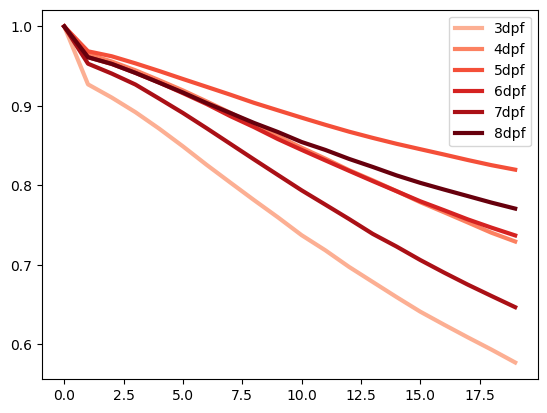

In [15]:
sub_df = auto_df[auto_df['region'] == 'Midbrain']

for i in range(3,9):

    plt.plot(np.mean(np.asarray(sub_df[sub_df['age']==str(i)]['auto_mean']),axis=0), label = f'{i}dpf',
              c = colors[i-1], linewidth=3)

# for i in range(1,10):
#     plt.axvline(i, c = 'grey')
# plt.xscale('log')
plt.legend()
# plt.xlim(1e-10, 50)
plt.savefig(Fdata + 'BLNDEV-WILDTYPE/' + 'prac.svg', transparent=True)
plt.show()

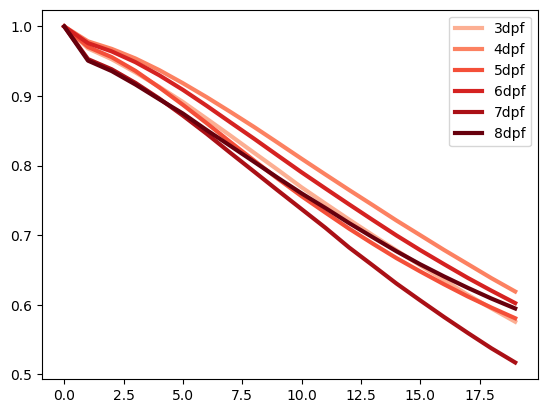

In [16]:
sub_df = auto_df[auto_df['region'] == 'Hindbrain']

for i in range(3,9):

    plt.plot(np.mean(np.asarray(sub_df[sub_df['age']==str(i)]['auto_mean']),axis=0), label = f'{i}dpf',
              c = colors[i-1], linewidth=3)

# for i in range(1,10):
#     plt.axvline(i, c = 'grey')
# plt.xscale('log')
plt.legend()
# plt.xlim(1e-10, 50)
plt.savefig(Fdata + 'BLNDEV-WILDTYPE/' + 'prac.svg', transparent=True)
plt.show()

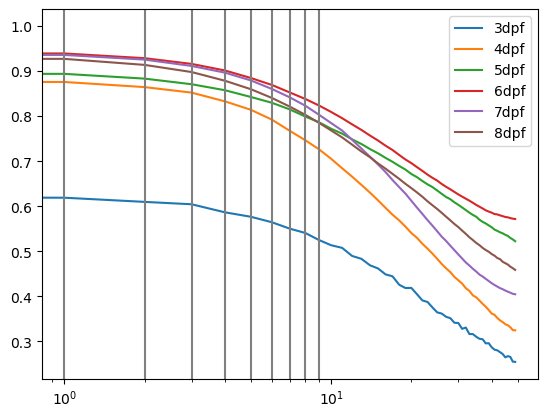

In [530]:
sub_df = auto_df[auto_df['region'] == 'Telencephalon']

for i in range(3,9):

    plt.plot(np.mean(np.asarray(sub_df[sub_df['age']==str(i)]['auto_mean']),axis=0), label = f'{i}dpf')

for i in range(1,10):
    plt.axvline(i, c = 'grey')
plt.xscale('log')
plt.legend()
plt.show()

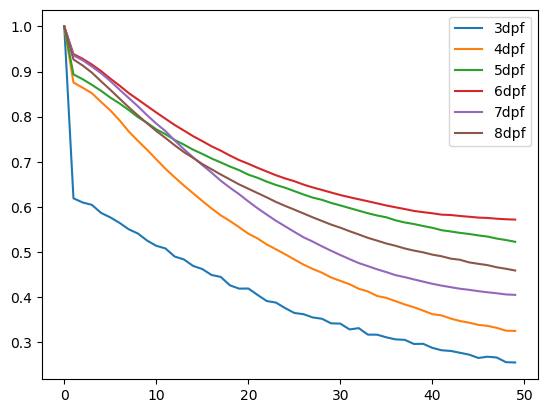

In [508]:
sub_df = auto_df[auto_df['region'] == 'Telencephalon']

for i in range(3,9):

    plt.plot(np.mean(np.asarray(sub_df[sub_df['age']==str(i)]['auto_mean']),axis=0), label = f'{i}dpf')
#plt.xscale('log')
plt.legend()
plt.show()

In [510]:
auto_df

,age,region,auto_mean,decay
0,4,Telencephalon,"[1.0000000000000002, 0.9560647005264838, 0.952...",NaN
1,4,Diencephalon,"[1.0000000000000002, 0.9823500359649283, 0.977...",NaN
2,4,Midbrain,"[1.0000000000000002, 0.9888954433107853, 0.984...",NaN
3,4,Hindbrain,"[0.9999999999999998, 0.9891983546175491, 0.981...",7.692308
4,5,Telencephalon,"[1.0, 0.8692645861241209, 0.8664776790749462, ...",13.186813
...,...,...,...,...
115,5,Hindbrain,"[1.0, 0.9739570700091066, 0.9554026313259388, ...",3.663004
116,8,Telencephalon,"[1.0000000000000002, 0.9280474570492606, 0.914...",5.860806
117,8,Diencephalon,"[0.9999999999999998, 0.9561040479223585, 0.951...",NaN
118,8,Midbrain,"[1.0000000000000002, 0.9693400646643908, 0.965...",NaN


In [ ]:
#plot with geometric spacing

for i in range(3,9):

    plt.plot(np.mean(np.asarray(auto_df[auto_df['age']==str(i)]['auto_mean']),axis=0), label = f'{i}dpf')
plt.legend()
plt.show()

In [7]:
import numpy as np

def autocorrelation(time_series,t):
    """
    Compute the autocorrelation of a time series for various lags.

    Args:
        time_series (np.array or pd.Series): The time series data as a NumPy array or Pandas Series.

    Returns:
        np.array: Autocorrelation coefficients for each lag.
    """
    n = len(time_series)
    mean = np.mean(time_series)
    var = np.var(time_series)
    autocorr = np.correlate(time_series - mean, time_series - mean, mode='full')[-n:] / var / n
    
    return autocorr[:t]  # Return half the range, as it mirrors past that point

import numpy as np

def estimate_e_folding_time(autocorr):
    """
    Estimate the e-folding time from an autocorrelation function,
    defined as the lag at which autocorrelation first falls below 1/e of its initial value.

    Args:
        autocorr (np.array): Autocorrelation coefficients, with autocorr[0] expected to be 1.

    Returns:
        float: E-folding time in terms of lag units (index). Returns NaN if never below 1/e of initial value.
    """
    initial_value = autocorr[0]  # Typically this is 1 for autocorrelation at lag 0
    target_value = (1 / np.e) * initial_value
    # Find the first index where autocorrelation falls below 1/e of the initial value
    below_threshold = np.where(autocorr < target_value)[0]
    if below_threshold.size > 0:
        return below_threshold[0]
    else:
        return np.nan
    
import numpy as np

def estimate_half_life(autocorr):
    """
    Estimate the half-life from an autocorrelation function,
    defined as the lag at which autocorrelation first falls below half of its initial value.

    Args:
        autocorr (np.array): Autocorrelation coefficients, with autocorr[0] expected to be 1.

    Returns:
        float: Half-life in terms of lag units (index). Returns NaN if never below half of initial value.
    """
    initial_value = autocorr[0]  # Typically this is 1 for autocorrelation at lag 0
    half_life_value = 0.5 * initial_value  # Half of the initial value
    # Find the first index where autocorrelation falls below half of the initial value
    below_half_life = np.where(autocorr < half_life_value)[0]
    if below_half_life.size > 0:
        return below_half_life[0]
    else:
        return np.nan
    
def estimate_decay(autocorr):
    """
    Estimate the half-life from an autocorrelation function,
    defined as the lag at which autocorrelation first falls below half of its initial value.

    Args:
        autocorr (np.array): Autocorrelation coefficients, with autocorr[0] expected to be 1.

    Returns:
        float: Half-life in terms of lag units (index). Returns NaN if never below half of initial value.
    """
    initial_value = autocorr[0]  # Typically this is 1 for autocorrelation at lag 0
    half_life_value = 0.7 * initial_value  # Half of the initial value
    # Find the first index where autocorrelation falls below half of the initial value
    below_half_life = np.where(autocorr < half_life_value)[0]
    if below_half_life.size > 0:
        return below_half_life[0]
    else:
        return np.nan

# Example usage, assuming autocorr is your autocorrelation array
# autocorr = np.exp(-np.linspace(0, 5, 100))  # Example of an exponentially decaying autocorr function
# half_life = estimate_half_life(autocorr)
# print("Half-life (lags):", half_life)

In [7]:
#Find causes of rotational stability
import glob
path = '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/'
dff_l = np.sort(glob.glob(path + '/*regdelt*'))
coord_l = np.sort(glob.glob(path + '/*labcoord*'))
len(dff_l), len(coord_l)

(30, 30)

In [10]:
# mean rotational stability -> cellwise 
reg_list = ['Telencephalon']
age_l, z_l, mean_l, ind_l = [],[],[],[]
for i in range(len(dff_l)):
    trace = np.load(dff_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(dff_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(dff_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        out = cos_coef(sub_dff)
        mean_l.append(np.mean(1-out))
        age_l.append(dff_l[i].split('dpf')[0][-1])
        z_l.append(out)
        ind_l.append(os.path.basename(name))
    print(name)
df = pd.DataFrame({'age':age_l, 'out':z_l, 'mean':mean_l, 'name':ind_l})

/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01
/Users/dominicburrows/Dropbox/PhD/Analys

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


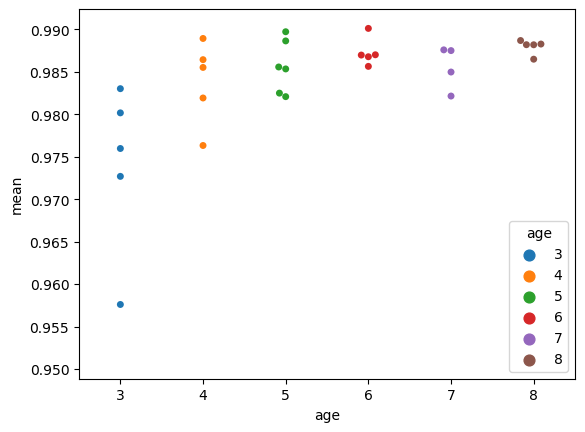

In [11]:
#mean rotational stability
import seaborn as sns
#plot mean cosine_coef across age (lower = closer) -> confirm 
sns.swarmplot(data=df, x="age", y="mean", hue = 'age', order = [str(i) for i in np.arange(3,9)])

In [9]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(df["age"], df["mean"])}')

Telencephalon SignificanceResult(statistic=0.606490074553085, pvalue=0.00038118386331051097)


In [19]:
# find n significant neurons at 8dpf -> rotationally stable neurons
#generate null distribution
df_3 = df[df['age']=='3'].reset_index()
null_dist = np.mean(np.concatenate(df_3['out']),axis=1)
df_8 = df[df['age']=='8'].reset_index()
emp_dist = np.mean(np.concatenate(df_8['out']),axis=1)
thresh = np.percentile(null_dist, 10)

#find neurons passing threshold -> significantly stable neurons
sum(fdr(null_dist,emp_dist, 0.15))

467

In [408]:
#find per fish
for i in range(len(df_8['out'])):
    print(sum(fdr(null_dist,np.mean(df_8['out'][i],axis=1), 0.15)))

108
72
181
50
112


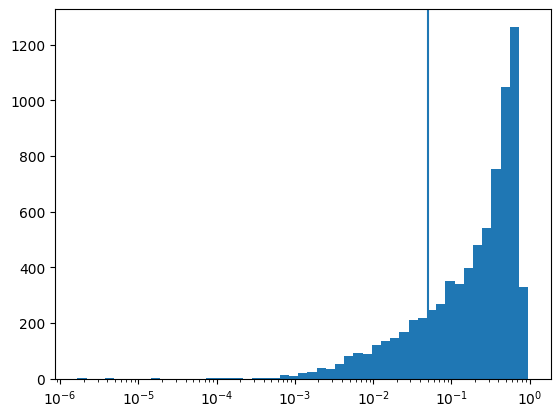

In [365]:
plt.hist(p_values,bins=np.geomspace(np.min(p_values), np.max(p_values))) 
plt.axvline(0.05)
plt.xscale('log')
plt.show()

In [403]:
sum(fdr(null_dist,emp_dist, 0.15))

467

In [ ]:
significant_indices = np.where((emp_dist < thresh) & rejected)[0]
significant_values = emp_dist[significant_indices]

# Print results
print("Indices of significant results based on FDR 0.1 and one-t

In [338]:
sum(p_values < 0.05)

0

In [410]:
dff.shape

(13323, 4914)

In [329]:
significant_mask

array([ True,  True, False, ..., False,  True, False])

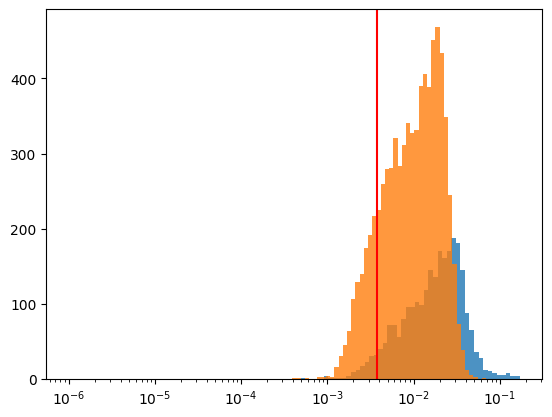

In [339]:
plt.hist(null_dist, bins = np.geomspace(0.000001, np.max(null_dist),100), alpha=0.8)
plt.hist(emp_dist, bins = np.geomspace(0.000001, np.max(emp_dist),100), alpha=0.8)

thresh = np.percentile(null_dist, 5)
plt.axvline(thresh, c='red')
plt.xscale('log')
plt.show()

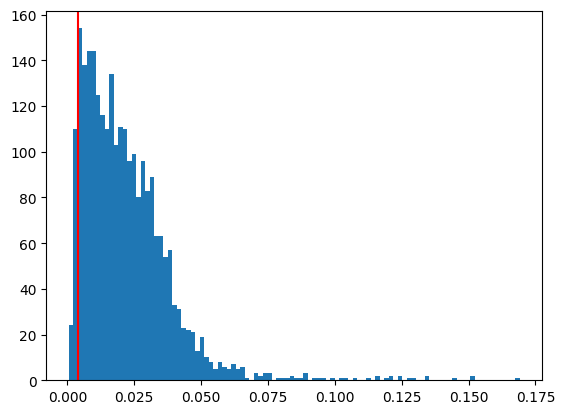

In [354]:
plt.hist(null_dist, bins = 100)
thresh = np.percentile(null_dist, 5)
plt.axvline(thresh, c='red')
plt.show()

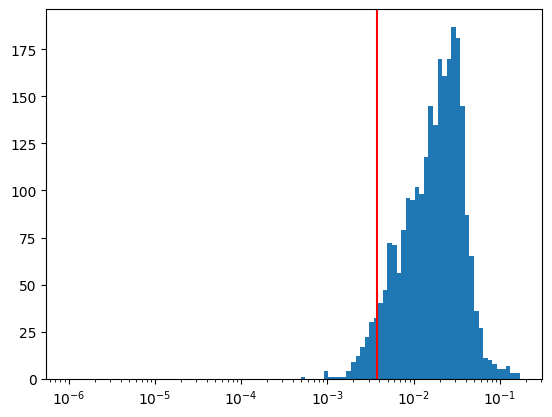

In [296]:
plt.hist(null_dist, bins = np.geomspace(0.000001, np.max(null_dist),100))
thresh = np.percentile(null_dist, 5)
plt.axvline(thresh, c='red')
plt.xscale('log')
plt.show()

In [ ]:
# find rotationally stable modes -> only use significant neurons, cluster these modes together -> see which pass chance!!

In [361]:
#find rotationally stable modes

#find per fish
outs_l, name_l, subbin_l = [],[],[]
for i in range(len(df_8['out'])):
    print(sum(fdr(null_dist,np.mean(df_8['out'][i],axis=1), 0.15)))
    bool_ = fdr(null_dist,np.mean(df_8['out'][i],axis=1), 0.15)    
    name_l.append(df_8['name'].loc[i])
    outs_l.append(df_8['out'][i][bool_])
df = pd.DataFrame({'out':outs_l, 'name':name_l})

108
72
181
50
112


In [362]:
#  test more similar than random
for curr in range(len(df)):
    data = df['out'][curr].T
    name = df['name'][curr]
    all_clust, sub_clust = affprop(data) 
    emp_sim = Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

    #Generate null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = affprop(rpks) #cluster with affinity prop on null data
    null_sim = Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
    if len(emp_sim) > n_states:
      print('null model removed a cluster')
        
    fin_clust = sub_clust[emp_sim > np.percentile(null_sim,90)] #Find the clusters that occur above chance
    dic = {'all':all_clust, 'final': fin_clust}
    np.save('/cndd3/dburrows/CODE/bin/' + name +'_state-labels.npy', dic) 

    print('Done' + str())

null model removed a cluster
Done
null model removed a cluster
Done
Done


/home/dburrows/mambaforge/envs/torch_lt/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/dburrows/mambaforge/envs/torch_lt/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


null model removed a cluster
Done
Done


In [20]:
curr_l

['/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-04_2photon_sess-01-8dpf_BLNGR_run-01_state-labels.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-08_2photon_sess-01-8dpf_BLNGR_run-01_state-labels.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01_state-labels.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-06_2photon_sess-01-8dpf_BLNGR_run-01_state-labels.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/BLNDEV-WILDTYPE-05_2photon_sess-01-8dpf_BLNGR_run-01_state-labels.npy']

In [21]:
#look at dynamics of modes, slowly evolving vs fast switching, dwell time
curr_l = glob.glob('/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNDEV-WILDTYPE/*state-labels*')
out_df = pd.DataFrame()
out_l = []
for c in curr_l:
    out_l.append(np.load(c,allow_pickle=True).item())
    name = os.path.basename(c) 
    for p in out_l[-1]['final']:
        data = out_l[-1]['all']
        binary_vector = np.where(data == p, 1, 0)
        curr = pd.DataFrame(binary_vector, columns =[name + '_' + str(p)]).T
        out_df = pd.concat([out_df, curr])

#to be considered rotational stable must appear at least 5 times
fin_df = out_df[np.sum(out_df.values,axis=1)>5]

In [22]:
np.load(c,allow_pickle=True)

array({'all': array([  0,   0,   0, ..., 108, 118,   7]), 'final': array([ 18,  27,  32,  35,  40,  47,  55,  58,  61,  62,  72,  73,  83,
        86,  87,  90,  91,  93,  95,  97,  98, 101, 103, 105, 106, 107,
       109, 110, 115, 132, 141, 143, 147, 153, 154, 155, 160, 162, 163,
       164, 169, 171, 173, 174, 176, 185, 186, 189, 190])}, dtype=object)

In [24]:
np.sum(out_df.values,axis=1)

array([ 2,  3,  2,  3,  8,  3,  5,  2,  3,  3,  3,  2,  3,  5,  7,  2,  4,
        2,  3,  3,  2,  9,  3,  3,  2,  9,  4,  3,  7,  2,  2,  2,  2,  2,
        3,  2,  2,  5,  5,  2,  3,  3, 12,  8,  2,  2,  3,  3,  6,  2,  2,
        6,  2,  3,  3,  3,  5,  2,  3,  5,  3,  5,  9,  2, 15,  4,  2,  3,
        2, 14,  7,  2,  4,  2, 19,  4,  2,  3, 14,  2, 17,  2,  6,  5,  2,
        2,  2, 13,  2,  3,  2,  2,  5,  2,  3,  5,  2,  2,  8,  2,  5,  3,
        2,  2,  2,  3,  2,  4,  9,  9,  6,  5,  2,  2,  2,  6,  4,  2,  3,
        2, 10,  8,  2,  3,  2,  2,  3,  2,  2,  3,  7,  3,  3,  2, 11,  2,
        3, 18,  2,  3,  3,  2,  3,  2,  5,  6,  2, 15,  4,  3, 10,  3,  2,
        2,  2,  2,  2,  2,  2,  6,  4,  2,  5,  7,  2,  4,  5,  3,  2,  2,
        2,  2,  3,  6,  3,  3,  2,  3,  2,  2,  5,  2,  5,  9,  3, 10,  2,
        2,  2,  2,  3,  6,  3,  3,  3,  2,  8,  2,  2,  2,  3,  2,  3,  3,
        2,  2,  3,  6,  2,  2,  2,  3,  2,  2,  2,  7,  7,  3,  2,  4, 10,
        5,  2,  4,  5,  2

In [377]:
len(fin_df)

52

In [ ]:
#look at spatial distribution of sig cells, subsets for slowly evolving vs fast switching

In [9]:
def time_corr(timescale,curr):
    outs = []
    # Compute the correlation matrix for each pair of consecutive time steps
    for t in range(curr.shape[1] - timescale):
        # Extract data for time steps t and t+1
        time_slice = curr[:, t:t+(timescale+1)]
        corr_matrix = np.corrcoef(time_slice)
        # Append the resulting correlation matrix to the list
        outs.append(corr_matrix)
    return(outs)

#Similarity
#==============================
def Similarity(curr_clust):
#==============================
    """
    This function calculates the mean similarity between state vecotrs belonging to a cluster.
    
    Inputs:
        curr_clust (np array): all state vectors belonging to this cluster
        
    Returns:
        mean_sim (float): the mean similarity

    """
    import numpy as np
    
    ijdot = np.inner(curr_clust, curr_clust)
    self_dot = np.apply_along_axis(np.max,0,ijdot)
    idot = np.reshape(np.repeat(self_dot, ijdot.shape[0]), ijdot.shape)
    jdot = np.reshape(np.repeat(self_dot, ijdot.shape[0]), ijdot.shape).T
    sim_mat = np.triu(ijdot / (idot + jdot - ijdot))
    np.fill_diagonal(sim_mat,0)
    mean_sim = np.mean(sim_mat[np.nonzero(sim_mat)])
    return(mean_sim)

#==============================
def affprop(data):
#==============================
    """
    This function performs affinity propagation on state vectors. 
    
    Inputs:
        data (np array): cells x timepoints, state vectors
        
    Returns:
        all_c (np array): 1d vector of cluster labels for each time point
        sub_c (np array): 1d vector of all unique cluster labels, that label more than a single time point

    """
    from sklearn.cluster import AffinityPropagation
    import numpy as np
    
    
    cluster = AffinityPropagation(damping = 0.5, max_iter = 300, convergence_iter = 10).fit(data)
    unq,counts = np.unique(cluster.labels_, return_counts = True)
    all_c = cluster.labels_
    sub_c = unq[counts > 1] #Remove clusters that have only a singular member
    return(all_c, sub_c)

#=========================================
def Sim_loop(data, all_clust, sub_clust):
#==========================================
    """
    This function loops through all clusters in a dataset and finds the mean similarity for each cluster. 
    
    Inputs:
        data (np array): cells x timepoints
        all_clust (np array): 1d vector of cluster labels for each time point
        sub_clust (np array): 1d vector of all unique cluster labels, that label more than a single time point

        
    Returns:
        sim_list (list): list of all similarities for each cluster

    """
    import numpy as np
    
    sim_list = list(range(len(sub_clust)))
    
    #Loop through all clusters with more than 1 member
    for i in range(len(sub_clust)):
        curr_clust = data[np.where(all_clust == sub_clust[i])[0]] #Find all time frames belonging to current cluster
        sim_list[i] = Similarity(curr_clust) #Calculate mean similarity for this cluster
    return(sim_list)

def cos_coef(inp):
    """inputs: 
        data = cellsxtime
        """
    # Assuming inp is your input numpy array
    # Normalize each column
    norms = np.linalg.norm(inp, axis=0)
    normalized_inp = inp / norms
    
    # Calculate differences between consecutive columns
    differences = np.abs(normalized_inp[:, :-1] - normalized_inp[:, 1:]) #1-(diff): 1 is maximal similarity, 0 is minimal
    return(differences)

def fdr(null_dist, emp_dist, alpha):
    from scipy.stats import norm
    from statsmodels.stats.multitest import multipletests
    
    # Assuming a normal distribution for simplicity; replace with your distribution if different
    lognull = np.log(null_dist)
    logemp = np.log(emp_dist)
    null_mean = np.mean(lognull)
    null_std = np.std(lognull)
    
    # Calculate one-tailed p-values for the empirical distribution
    # Using the CDF to get the probability of values as extreme or more extreme in the left tail
    p_values = norm.cdf(logemp, loc=null_mean, scale=null_std)
    
    # Apply the Benjamini-Hochberg FDR correction
    rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')
    return(rejected)


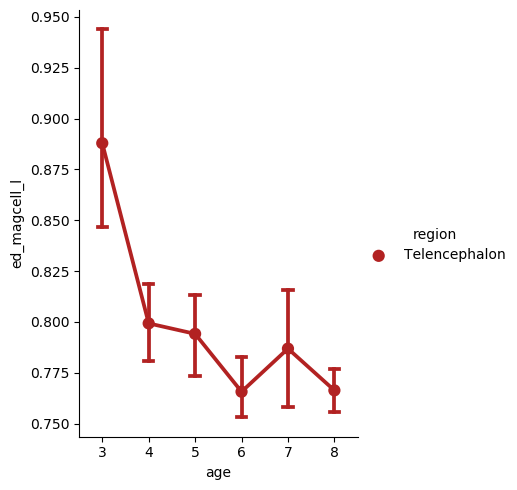

In [126]:
import seaborn as sns
nom = 'cosine similarity'
data_name = 'ed_magcell_l'
dic = state_df
dic[data_name] = dic[data_name].astype(float)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, y=data_name, x='age', hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Telencephalon'], palette=['firebrick'])

# Set x and y tick labels
# cat_plot.set_yticklabels(fontsize=10)  # Set y-axis tick labels
# cat_plot.set_xticklabels(fontsize=10)  # Set x-axis tick labels
# cat_plot.set_axis_labels('day post fertilisation', nom)
# cat_plot.set_xlabels(fontsize=20)
# cat_plot.set_ylabels(fontsize=20)
# # plt.ylim(0.85, 1.01)
# # plt.hlines(1, 0,5, linestyles='--', color = 'k', linewidth=2)
# plt.yticks(size = 20)
# plt.xticks(size = 20)

#plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [65]:
#=================
def cosine_sim(data):
#================
    """
    This functions calculates the cosine similarity from one point in time to to the next in state space. 
    
    Inputs:
        data (np array): cells x timeframes

    Returns:
        dist (np array): 1d vector, distance distribution
    """
    import numpy as np
    dist = np.zeros((data.shape[1])-1)
    for i in range(dist.shape[0]):
        data_t0 = data[:,i]
        data_t1 = data[:,i+1]
        dp = sum(data_t0 * data_t1) #dot product
        # Magnitude of each vector (norm)
        norm_t0 = np.linalg.norm(data_t0)
        norm_t1 = np.linalg.norm(data_t1)
        
        # Handling division by zero if either vector is zero (adding a small constant epsilon)
        epsilon = 1e-10  # A small number to avoid division by zero
        mag_prod = max(norm_t0 * norm_t1, epsilon)
        
        dist[i] = dp / mag_prod
    return(dist)

In [112]:
#======================================================================================
def state_dist_normbymagcell(data):
#======================================================================================
    """
    This functions calculates the euclidean distance from one point in time to to the next in state space. 
    
    Inputs:
        data (np array): cells x timeframes

    Returns:
        dist (np array): 1d vector, distance distribution
    """
    import numpy as np
    dist = np.zeros((data.shape[1])-1)
    for i in range(dist.shape[0]):
        data_t0 = data[:,i]/np.linalg.norm(data[:,i])
        data_t1 = data[:,i+1]/np.linalg.norm(data[:,i+1])
        
        dist[i] = np.linalg.norm(data_t0 - data_t1)#euclidean distance distribution
    return(dist)

In [299]:
#======================================================================================
def magnitude_distance(data):
#======================================================================================
    """
    This functions calculates the euclidean distance from one point in time to to the next in state space. 
    
    Inputs:
        data (np array): cells x timeframes

    Returns:
        dist (np array): 1d vector, distance distribution
    """
    import numpy as np
    dist = np.zeros((data.shape[1])-1)
    for i in range(dist.shape[0]):
        data_t0 = np.linalg.norm(data[:,i])
        data_t1 = np.linalg.norm(data[:,i+1])
        
        dist[i] = ((data_t0 - data_t1)**2 ) / data.shape[0] #euclidean distance distribution
    return(dist)

In [73]:
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regrace*')

#estimate cosine similarity
age_l, reg_l, data_l = [],[],[]
for t in range(len(trace_l)):
    age_l.append(trace_l[t].split('dpf')[0][-1])
    reg_l.append(trace_l[t].split('_run-01_')[1].split('_dynamics.npy')[0])
    data_l.append(np.load(trace_l[t], allow_pickle=True).item()['n_states'])
state_df = pd.DataFrabme({'age':age_l, 'region':reg_l, 'data':data_l})


Signature: np.linalg.norm(x, ord=None, axis=None, keepdims=False)
Docstring:
Matrix or vector norm.

This function is able to return one of eight different matrix norms,
or one of an infinite number of vector norms (described below), depending
on the value of the ``ord`` parameter.

Parameters
----------
x : array_like
    Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
    is None. If both `axis` and `ord` are None, the 2-norm of
    ``x.ravel`` will be returned.
ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
    Order of the norm (see table under ``Notes``). inf means numpy's
    `inf` object. The default is None.
axis : {None, int, 2-tuple of ints}, optional.
    If `axis` is an integer, it specifies the axis of `x` along which to
    compute the vector norms.  If `axis` is a 2-tuple, it specifies the
    axes that hold 2-D matrices, and the matrix norms of these matrices
    are computed.  If `axis` is None then either a vector norm (when `x`
    is 1

In [66]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Telencephalon"], dic["age"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Diencephalon"], dic["age"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic[data_name][dic["region"] == "Midbrain"], dic["age"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic[data_name][dic["region"] == "Hindbrain"], dic["age"][dic["region"] == "Hindbrain"])}')

Telencephalon SpearmanrResult(correlation=-0.6615434890586478, pvalue=6.872228755038197e-05)
Diencephalon SpearmanrResult(correlation=-0.25496048521018827, pvalue=0.17391410640278965)
Midbrain SpearmanrResult(correlation=-0.036100599675778874, pvalue=0.8497866194179927)
Hindbrain SpearmanrResult(correlation=-0.12161389515778007, pvalue=0.5220517640487716)


In [71]:
# LE
age_l, reg_l, data_l = [],[],[]
for t in range(len(trace_l)):
    age_l.append(trace_l[t].split('dpf')[0][-1])
    reg_l.append(trace_l[t].split('_run-01_')[1].split('_dynamics.npy')[0])
    data_l.append(np.mean(np.load(trace_l[t], allow_pickle=True).item()['le']))
le_df = pd.DataFrame({'age':age_l, 'region':reg_l, 'data':data_l})

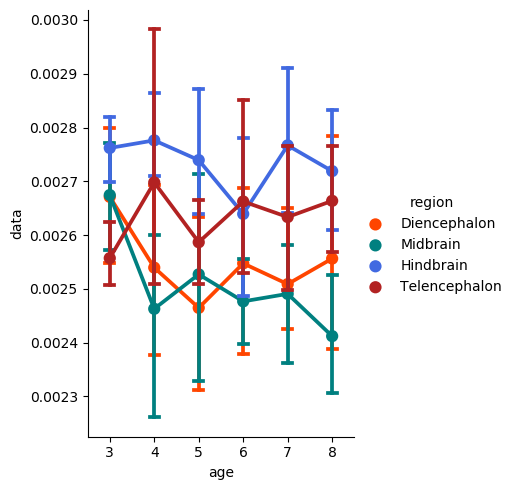

In [72]:
import seaborn as sns
nom = 'mean dwell time'
data_name = 'data'
dic = le_df
dic['data'] = dic['data'].astype(float)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, y='data', x='age', hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain','Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
# cat_plot.set_yticklabels(fontsize=10)  # Set y-axis tick labels
# cat_plot.set_xticklabels(fontsize=10)  # Set x-axis tick labels
# cat_plot.set_axis_labels('day post fertilisation', nom)
# cat_plot.set_xlabels(fontsize=20)
# cat_plot.set_ylabels(fontsize=20)
# # plt.ylim(0.85, 1.01)
# # plt.hlines(1, 0,5, linestyles='--', color = 'k', linewidth=2)
# plt.yticks(size = 20)
# plt.xticks(size = 20)

#plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [45]:
sys.path.insert(1, '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/Github/criticality/')
import criticality as crfn
import trace_analyse as tfn

In [46]:
reg_list = ['Telencephalon']#, 'Diencephalon', 'Midbrain', 'Hindbrain']

for i in range(len(trace_l[:1])):
    trace = np.load(trace_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(bind_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(trace_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        data = tfn.trace_analyse(name, sub_trace, sub_dff, sub_bind, sub_coord) #Initiate class
        

Loaded BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01


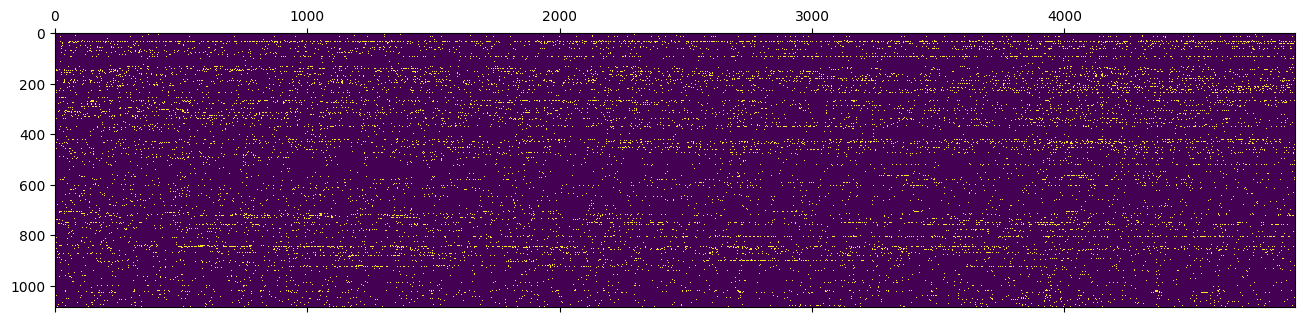

In [49]:
plt.matshow(sub_bind)

In [80]:
#Calculate criticality statistics
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regtrace*')
dff_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regdelt*')
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*')
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*labcoor*')
len(trace_l), len(dff_l), len(bind_l), len(coord_l)

(30, 30, 30, 30)

In [103]:
%autoreload
# Run brain dynamics stats across all brain areas

reg_list = ['Telencephalon']#, 'Diencephalon', 'Midbrain', 'Hindbrain']

#for i in range(len(trace_l)):
i=0
trace = np.load(trace_l[i])
dff = np.load(dff_l[i])
bind = np.load(bind_l[i])
coord = (np.load(coord_l[i]))
name = adfn.save_name(trace_l[i])

for reg in reg_list:
    sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
    data = tfn.trace_analyse(name, sub_trace, sub_dff, sub_bind, sub_coord) #Initiate class

    #Criticality statistics
    bind_transformed = sub_bind[:,1:4913].T
    dynamics = data.dyn_stats(bind_transformed) 

        par_list = ['n_states', 'm_dwell', 'null_m_dwell', 'dist', 'le']
        dic = {}
        dic.update({par: data.__dict__[par] for par in par_list})
        np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + '_' + reg + '_dynamics.npy', dic)

    print('Processed ' + name)

Loaded BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01
metastability calculated
LE calculated


In [104]:
data.__dict__

{'name': 'BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01',
 'trace': array([[1.27075867e+03, 2.03832483e+03, 1.63346143e+03, ...,
         8.15309448e+02, 1.15583911e+03, 4.68564636e+02],
        [2.57491207e+00, 3.87655304e+02, 1.31147858e+02, ...,
         5.29264038e+02, 2.44899261e+02, 1.17226489e+03],
        [1.06781226e+03, 5.45358337e+02, 5.71542786e+02, ...,
         1.33888153e+02, 1.01959985e+03, 9.01492462e+01],
        ...,
        [3.79388541e-01, 1.74701508e+02, 6.30492859e+02, ...,
         9.74391251e+01, 2.31600327e+02, 2.87070068e+02],
        [3.35123566e+02, 2.46716476e+02, 2.47767487e+02, ...,
         2.29882836e+00, 3.00220947e+02, 1.31851456e+02],
        [1.42071877e+01, 1.40781174e+02, 1.52911407e+02, ...,
         3.66172943e+01, 3.96210907e+02, 2.89163570e+01]], dtype=float32),
 'dff': array([[ 3.57388091,  6.33645535,  4.87929678, ...,  1.93465757,
          3.16026998,  0.68667632],
        [ 0.        , 12.41520977,  4.07008505, ..., 17.02225876,
 

In [90]:
%autoreload
dot = sub_bind[:,1:4913].T
n_states, p_state, m_dwell, null_m_dwell, v_dwell = meta(dot)

4912
4912


In [91]:
n_states, p_state, m_dwell, null_m_dwell, v_dwell

(29,
 array([0.01506515, 0.01180782, 0.01180782, 0.00977199, 0.01974756,
        0.01934039, 0.01241857, 0.01934039, 0.01058632, 0.0384772 ,
        0.03216612, 0.01099349, 0.05557818, 0.03216612, 0.02076547,
        0.00997557, 0.01058632, 0.03542345, 0.01913681, 0.03318404,
        0.03074104, 0.02422638, 0.01017915, 0.03338762, 0.03277687,
        0.02076547, 0.05863192, 0.00895765, 0.03440554]),
 array([1.01369863, 1.        , 1.        , 1.0212766 , 1.04301075,
        1.04395604, 1.03389831, 1.02150538, 1.        , 1.05586592,
        1.03947368, 1.01886792, 1.04198473, 1.01935484, 1.00990099,
        1.04255319, 1.        , 1.04191617, 1.03296703, 1.02515723,
        1.02027027, 1.01709402, 1.02040816, 1.03797468, 1.03205128,
        1.00990099, 1.07865169, 1.04761905, 1.02424242]),
 1.0293378038558256,
 [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.,

In [94]:
%autoreload
dot = sub_bind[:,1:4913].T
n_states, p_state, m_dwell, null_m_dwell, v_dwell = tfn.meta(dot)

4912
4912


In [95]:
n_states, p_state, m_dwell, null_m_dwell, v_dwell

(30,
 array([0.01221498, 0.00916124, 0.0120114 , 0.00671824, 0.00875407,
        0.02259772, 0.02137622, 0.01180782, 0.01425081, 0.01160423,
        0.03196254, 0.03888436, 0.01038274, 0.05944625, 0.03420195,
        0.0156759 , 0.01140065, 0.0107899 , 0.03175896, 0.02178339,
        0.03623779, 0.00834691, 0.03013029, 0.02219055, 0.0095684 ,
        0.02931596, 0.03359121, 0.02198697, 0.06453583, 0.03196254]),
 array([1.01694915, 1.        , 1.        , 1.        , 1.02380952,
        1.01834862, 1.02941176, 1.        , 1.        , 1.01785714,
        1.01290323, 1.03243243, 1.02      , 1.04285714, 1.03703704,
        1.        , 1.01818182, 1.01923077, 1.02631579, 1.        ,
        1.05325444, 1.        , 1.02777778, 1.        , 1.        ,
        1.04347826, 1.0443038 , 1.02857143, 1.06020067, 1.02614379]),
 1.0362869198312237,
 [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,


In [253]:
data.shape

(4914, 1086)

In [64]:
%autoreload
dot = sub_trace.T
n_states, p_state, m_dwell, null_m_dwell, v_dwell = meta(dot)

4914
4914


In [ ]:
data = dot
from sklearn.cluster import AffinityPropagation
import numpy as np


cluster = AffinityPropagation(damping = 0.5, max_iter = 200, convergence_iter = 15).fit(data)
unq,counts = np.unique(cluster.labels_, return_counts = True)
all_c = cluster.labels_
sub_c = unq[counts > 1] #Remove clusters that have only a singular member
print(len(all_c))


4914


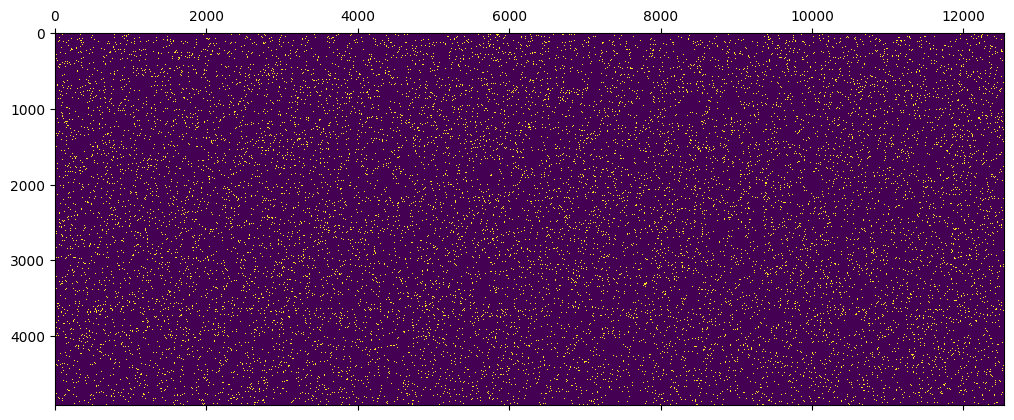

In [39]:
plt.matshow(data)

In [52]:
unq,counts

(array([0, 1, 2]), array([   1,    1, 4912]))

In [15]:
def meta(data):
    import numpy as np

    #Empirical data
    all_clust, sub_clust = affprop(data) #cluster with affinity prop on empirical data
    emp_sim = Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

    #Generate null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = affprop(rpks) #cluster with affinity prop on null data
    null_sim = Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
    tot_states = len(emp_sim)
    n_states = sum(emp_sim > np.percentile(null_sim, 0.9))

    #check on nulled confirmed
    fin_clust = sub_clust[emp_sim > np.percentile(null_sim, 0.9)] #Find the clusters that occur above chance
    p_state, m_dwell, v_dwell = state_stats(fin_clust, all_clust) #Calculate state transition statistics

    if len(fin_clust)>0:
        null_m_dwell = null_states(fin_clust, data) #Calculate the mean dwell time with random dynamics
    else: null_m_dwell=None

    return(n_states, p_state, m_dwell, null_m_dwell, v_dwell)

In [14]:
#Cluster with affinity propagation
#==============================
def affprop(data):
#==============================
    """
    This function performs affinity propagation on state vectors. 
    
    Inputs:
        data (np array): cellsxtimepoints, state vectors
        
    Returns:
        all_c (np array): 1d vector of cluster labels for each time point
        sub_c (np array): 1d vector of all unique cluster labels, that label more than a single time point

    """
    from sklearn.cluster import AffinityPropagation
    import numpy as np
    
    
    cluster = AffinityPropagation(damping = 0.5, max_iter = 200, convergence_iter = 15).fit(data)
    unq,counts = np.unique(cluster.labels_, return_counts = True)
    all_c = cluster.labels_
    sub_c = unq[counts > 1] #Remove clusters that have only a singular member
    print(len(all_c))
    return(all_c, sub_c)

#Similarity
#==============================
def Similarity(curr_clust):
#==============================
    """
    This function calculates the mean similarity between state vecotrs belonging to a cluster.
    
    Inputs:
        curr_clust (np array): all state vectors belonging to this cluster
        
    Returns:
        mean_sim (float): the mean similarity

    """
    import numpy as np
    
    ijdot = np.inner(curr_clust, curr_clust)
    self_dot = np.apply_along_axis(np.max,0,ijdot)
    idot = np.reshape(np.repeat(self_dot, ijdot.shape[0]), ijdot.shape)
    jdot = np.reshape(np.repeat(self_dot, ijdot.shape[0]), ijdot.shape).T
    sim_mat = np.triu(ijdot / (idot + jdot - ijdot))
    np.fill_diagonal(sim_mat,0)
    mean_sim = np.mean(sim_mat[np.nonzero(sim_mat)])
    return(mean_sim)

#=========================================
def Sim_loop(data, all_clust, sub_clust):
#==========================================
    """
    This function loops through all clusters in a dataset and finds the mean similarity for each cluster. 
    
    Inputs:
        data (np array): cells x timepoints
        all_clust (np array): 1d vector of cluster labels for each time point
        sub_clust (np array): 1d vector of all unique cluster labels, that label more than a single time point

        
    Returns:
        sim_list (list): list of all similarities for each cluster

    """
    import numpy as np
    
    sim_list = list(range(len(sub_clust)))
    
    #Loop through all clusters with more than 1 member
    for i in range(len(sub_clust)):
        curr_clust = data[np.where(all_clust == sub_clust[i])[0]] #Find all time frames belonging to current cluster
        sim_list[i] = Similarity(curr_clust) #Calculate mean similarity for this cluster
    return(sim_list)


#==========================================
def state_stats(fin_clust, all_clust):
#==========================================
    """
    This function calculates the probability and mean dwell times of each state. 
    
    Inputs:
        fin_clust (np array): 1d vector of state cluster labels occur with above chance probability
        all_clust (np array): 1d vector of cluster labels for each time point
        
    Returns:
        p_state (np.array):  1d vec containing probabilities of each state
        m_dwell (np.array): 1d vec containing the mean dwell time for each state
        full_vec (list): contains all durations in between every single state transition 
        
    """

    import more_itertools as mit
    import numpy as np

    p_state, m_dwell = np.zeros(len(fin_clust)),np.zeros(len(fin_clust)) 
    
    full_vec = list(range(len(fin_clust)))
    for i in range(len(fin_clust)):
        
        #calculate probabilities of each state
        p_state[i] = len(np.where(all_clust == fin_clust[i])[0])/len(all_clust)
        
        #find all periods with the same state over consecutive time frames
        dur_list = [list(group) for group in mit.consecutive_groups(np.where(all_clust == fin_clust[i])[0])]
        vec = []
        
        for t in range(len(dur_list)):
            vec = np.append(vec, len(dur_list[t]))
        m_dwell[i] = np.mean(vec)
        full_vec[i] = vec
    return(p_state, m_dwell, full_vec)


#==========================================
def null_states(fin_clust, data):
#==========================================
    """
    This function calculates the mean dwell time in a system with a given number of states and random dynamics. 
    
    Inputs:
        fin_clust (np array): 1d vector of state cluster labels occur with above chance probability
        data (np array): cells x timepoints
        
    Returns:
        null_m_dwell (np.array): 1d vec containing the mean dwell time for each state

    """

    import random
    import more_itertools as mit
    import numpy as np

    all_states = np.arange(1,len(fin_clust)+1)
    rand_states = np.array(random.choices(all_states, k = data.shape[0]))
    dur_list = [list(group) for group in mit.consecutive_groups(rand_states)]
    vec = []
    for t in range(len(dur_list)):
        vec = np.append(vec, len(dur_list[t]))
    null_m_dwell = np.mean(vec)
    return(null_m_dwell)


In [260]:
all_clust, sub_clust

(array([0, 2, 2, ..., 2, 2, 2]), array([2]))

In [258]:
data = dot
import numpy as np

#Empirical data
all_clust, sub_clust = tfn.affprop(data) #cluster with affinity prop on empirical data
emp_sim = tfn.Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

# #Generate null data
# rpks = np.zeros((data.shape))
# for t in range(data.shape[0]):
#     temp_pks = data[t]
#     np.random.shuffle(temp_pks) 
#     rpks[t] = temp_pks

# null_all_clust, null_sub_clust = tfn.affprop(rpks) #cluster with affinity prop on null data
# null_sim = tfn.Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
# tot_states = len(emp_sim)
# n_states = sum(emp_sim > np.percentile(null_sim, 0.9))

# #check on nulled confirmed
# fin_clust = sub_clust[emp_sim > np.percentile(null_sim, 0.9)] #Find the clusters that occur above chance
# p_state, m_dwell, v_dwell = tfn.state_stats(fin_clust, all_clust) #Calculate state transition statistics

# if len(fin_clust)>0:
#     null_m_dwell = tfn.null_states(fin_clust, data) #Calculate the mean dwell time with random dynamics
# else: null_m_dwell=None


4914


/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/Github/Criticality/trace_analyse.py:391: RuntimeWarning: invalid value encountered in divide
  sim_mat = np.triu(ijdot / (idot + jdot - ijdot))


In [245]:
n_states, p_state, m_dwell, null_m_dwell, v_dwell

(0, array([], dtype=float64), array([], dtype=float64), None, [])

In [ ]:
#==============================
    """
    This function calculates the mean similarity between state vecotrs belonging to a cluster.
    
    Inputs:
        curr_clust (np array): all state vectors belonging to this cluster
        
    Returns:
        mean_sim (float): the mean similarity

    """
    import numpy as np
    
    ijdot = np.inner(curr_clust, curr_clust)
    self_dot = np.apply_along_axis(np.max,0,ijdot)
    idot = np.reshape(np.repeat(self_dot, ijdot.shape[0]), ijdot.shape)
    jdot = np.reshape(np.repeat(self_dot, ijdot.shape[0]), ijdot.shape).T
    sim_mat = np.triu(ijdot / (idot + jdot - ijdot))
    np.fill_diagonal(sim_mat,0)
    mean_sim = np.mean(sim_mat[np.nonzero(sim_mat)])
    return(mean_sim)

In [39]:
#Calculate criticality statistics
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regtrace*')
dff_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regdelt*')
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*')
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*labcoor*')
len(trace_l), len(dff_l), len(bind_l), len(coord_l)

(30, 30, 30, 30)

In [ ]:
reg_list = ['Telencephalon']#, 'Diencephalon', 'Midbrain', 'Hindbrain']

for i in range(len(trace_l[:1])):
    trace = np.load(trace_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(bind_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(trace_l[i])

In [43]:
bind.shape

(15105, 4914)

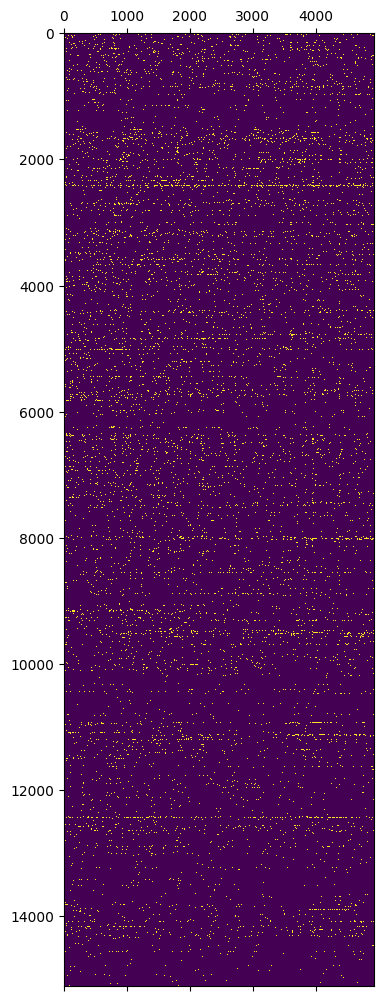

In [42]:
def metastability(data):
    import numpy as np

    #Empirical data
    all_clust, sub_clust = mfn.affprop(data) #cluster with affinity prop on empirical data
    emp_sim = mfn.Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

    #Generate null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = mfn.affprop(rpks) #cluster with affinity prop on null data
    null_sim = mfn.Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
    n_states = len(emp_sim > np.max(null_sim))
    if len(emp_sim) > n_states:
      print('null model removed a cluster')

    fin_clust = sub_clust[emp_sim > max(null_sim)] #Find the clusters that occur above chance
    p_state, m_dwell, v_dwell = mfn.state_stats(fin_clust, all_clust) #Calculate state transition statistics
    null_m_dwell = mfn.null_states(fin_clust, data) #Calculate the mean dwell time with random dynamics
    return(n_states, p_state, m_dwell, null_m_dwell, v_dwell)



In [ ]:
#This function extracts each data type
def load(data_list, name_list):

    obj = { i:[[]]*len(data_list) for i in name_list  }

    for i in range(len(data_list)):
        for e in range(len(data_list[i])):
            data = np.load(data_list[i][e], allow_pickle=True).item()
            for name in name_list:
                curr = data[name]
                obj[name][i] = np.append(obj[name][i], curr)

        print(i)
        
    len_list = []
    for i in range(len(data_list)):
        count = 0
        for e in range(len(data_list[i])):
            count+=1

        len_list = np.append(len_list, count)
        
    return(obj, len_list)
            
#This function sorts all data by condition
def sort(curr_name, obj):
    input_data = adfn.comb_list(obj[curr_name])

    cond = np.arange(3, 9)
    cond_l = []
    for i in range(len(len_list)):
        for e in range(int(len_list[i])):
            cond_l = np.append(cond_l, cond[i])

    df = pd.DataFrame({curr_name:input_data , "condition": cond_l})
    return(df)

In [67]:
#Load developmental data
meta_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*meta*')

In [63]:
#How many brain states
ch = 0
data_l, lab_l = [],[]
#
for x,lab in enumerate(label_v):
    data_l = np.append(data_l,[np.load(dpf_l[x][i], allow_pickle=True)[ch] for i in range(len(dpf_l[x]))])
    lab_l = np.append(lab_l, np.repeat(label_v[x], len(dpf_l[x])))
df = pd.DataFrame({'data': data_l, 'label': lab_l})


In [64]:
df

,data,label
0,15.0,3.0
1,15.0,3.0
2,7.0,3.0
3,20.0,3.0
4,12.0,3.0
5,14.0,4.0
6,10.0,4.0
7,18.0,4.0
8,42.0,4.0
9,29.0,4.0


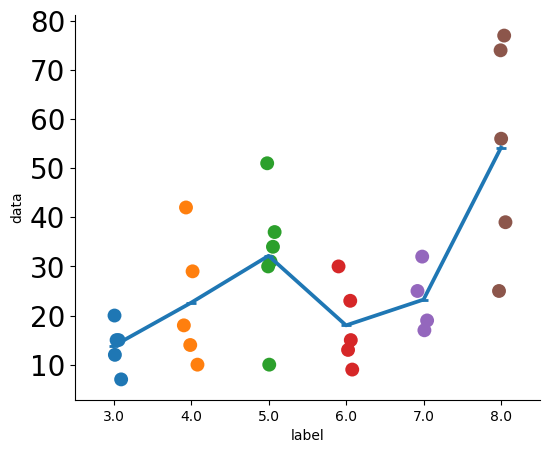

In [65]:
import seaborn as sns
from matplotlib.collections import PathCollection

dic = df
data_name = 'number of states'

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="label", y='data', data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="label", y='data', data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [66]:
from scipy import stats
stats.pearsonr(dic['data'], dic['label'])

(0.536261772969854, 0.0022529672786245577)

In [68]:
#How many brain states
ch = 3
data_l, lab_l = [],[]
#
for x,lab in enumerate(label_v):
    data_l = np.append(data_l,[np.load(dpf_l[x][i], allow_pickle=True)[ch] for i in range(len(dpf_l[x]))])
    lab_l = np.append(lab_l, np.repeat(label_v[x], len(dpf_l[x])))
df = pd.DataFrame({'data': data_l, 'label': lab_l})


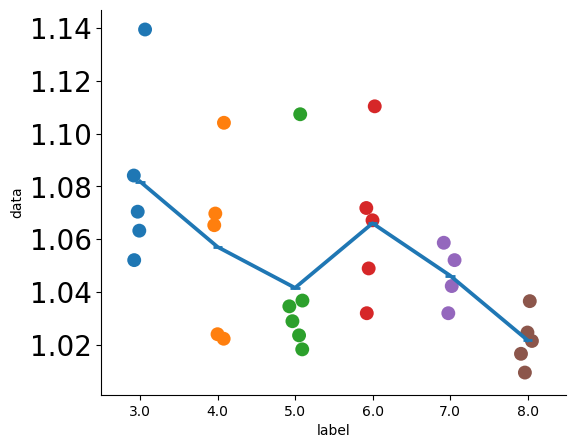

In [70]:
import seaborn as sns
from matplotlib.collections import PathCollection

dic = df
data_name = 'number of states'

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="label", y='data', data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="label", y='data', data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [71]:
from scipy import stats
stats.pearsonr(dic['data'], dic['label'])

(-0.47282931152549623, 0.008323247877378015)

In [106]:
dff_l[:3], trace_l[:3],bind_l[:3]

(['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regdeltaff.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regdeltaff.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regdeltaff.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy'])

In [107]:
dff_l[1], trace_l[1],bind_l[1]

('BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regdeltaff.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy')

In [108]:
delt = np.load(dff_l[1])
trace = np.load(trace_l[1])
bind = np.load(bind_l[1])


In [109]:
delt.shape, trace.shape,bind.shape

((14559, 4914), (14559, 4914), (14559, 4914))

In [104]:
delt.shape, trace.shape,bind.shape

((14559, 4914), (24477, 5733), (14559, 4914))

In [73]:
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*realtr*')
trace_l

['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLND

In [75]:
pr = np.load(trace_l[10])
pr[0]

array([ 8.81966171e+01, -4.00752097e-01,  5.54569397e+02, ...,
        3.08084412e+02, -2.74841642e+00,  1.22249886e+02], dtype=float32)

In [80]:
pr[4]

array([894.4754 ,  28.37283, 357.13254, ..., 101.30086, 235.58951,
       362.80646], dtype=float32)

In [68]:
pr = np.load(trace_l[0])
pr

array([[-4.4608583e+00,  4.3878751e+00,  6.4941992e+02, ...,
         3.8592245e+02,  2.4746797e+02,  1.7691220e+02],
       [ 1.5892515e+03,  7.5515784e+02,  1.3111333e+03, ...,
         2.9942767e+02,  1.6652362e+02,  4.0347443e+02],
       [ 2.1465468e+02,  2.1866428e+03,  1.2086118e+03, ...,
        -4.6677473e-01,  1.5798528e+02,  7.7582306e-01],
       ...,
       [ 2.4637550e-01, -6.7999029e-01, -1.0938400e+01, ...,
         1.1824801e+01, -5.0566750e+00,  1.6300457e+01],
       [-1.5456740e+00, -6.8531208e+00, -1.8173116e+00, ...,
         8.5742416e+00,  1.1901367e+00,  7.8926697e+00],
       [ 2.5418372e+00,  7.3278384e+00,  3.3624290e+01, ...,
         1.3673939e+01,  2.4071004e+00,  6.9960542e+00]], dtype=float32)